<a href="https://colab.research.google.com/github/eugenie-kim012/Health-Data-Analysis/blob/main/%EA%B9%80%EC%9C%A0%EC%A7%84_Exploring_Mental_Health_Data_V1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

성능 - https://docs.google.com/spreadsheets/d/19UhoZQsd_WtWXUYPPBCUNHN2Fr1f_LtJ2Pp37g_uEms/edit?gid=0#gid=0

#1. 데이터의 불러오기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings("ignore")

In [2]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
sub=pd.read_csv('sample_submission.csv')

#2. 데이터 확인하기

In [3]:
train.head()

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140700 entries, 0 to 140699
Data columns (total 20 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   id                                     140700 non-null  int64  
 1   Name                                   140700 non-null  object 
 2   Gender                                 140700 non-null  object 
 3   Age                                    140700 non-null  float64
 4   City                                   140700 non-null  object 
 5   Working Professional or Student        140700 non-null  object 
 6   Profession                             104070 non-null  object 
 7   Academic Pressure                      27897 non-null   float64
 8   Work Pressure                          112782 non-null  float64
 9   CGPA                                   27898 non-null   float64
 10  Study Satisfaction                     27897 non-null   

In [5]:
train.duplicated().value_counts()

,count
False,140700


In [6]:
print(train['Working Professional or Student'].unique())

['Working Professional' 'Student']


In [7]:
print(train['Have you ever had suicidal thoughts ?'].unique())

['No' 'Yes']


In [8]:
print(train['Gender'].unique())

['Female' 'Male']


In [9]:
print(train['Degree'].unique())

['BHM' 'LLB' 'B.Pharm' 'BBA' 'MCA' 'MD' 'BSc' 'ME' 'B.Arch' 'BCA' 'BE'
 'MA' 'B.Ed' 'B.Com' 'MBA' 'M.Com' 'MHM' 'BA' 'Class 12' 'M.Tech' 'PhD'
 'M.Ed' 'MSc' 'B.Tech' 'LLM' 'MBBS' 'M.Pharm' 'UX/UI Designer' 'MPA' 'BH'
 'Nalini' 'BEd' 'B.Sc' 'Veda' 'Bhopal' 'S.Tech' 'Degree' '20' 'Class 11'
 'H_Pharm' 'M' 'P.Com' 'BPharm' 'Business Analyst' 'M.Arch' 'LL.Com'
 'Data Scientist' 'MPharm' 'L.Ed' 'P.Pharm' 'Kalyan' 'Unite' 'BArch'
 'HR Manager' 'Badhya' 'S.Pharm' 'LLBA' 'Vrinda' 'M. Business Analyst'
 'Bhavesh' '0' 'LLCom' '29' 'MTech' 'Vivaan' 'BPA' 'Plumber' '5.61' 'Brit'
 'B.03' 'Ritik' '5.56' 'MEd' 'B' 'B BA' '7.06' 'B.B.Arch' 'ACA' 'Brithika'
 'CGPA' '24' 'M_Tech' 'Pihu' 'BB' 'Jhanvi' 'LLTech' 'Aarav' 'Entrepreneur'
 '8.56' 'LHM' 'Lata' 'S.Arch' 'Marsh' 'HCA' '5.88' 'B.Student' 'LL B.Ed'
 'M.S' 'Navya' 'Mahika' nan 'K.Ed' 'B.3.79' 'Mthanya'
 'Working Professional' 'Esha' 'LLS' 'LLEd' 'E.Tech' 'Doctor' 'N.Pharm'
 'LCA' 'B B.Com' 'RCA' 'Mihir' 'Advait']


#3. 데이터의 결측치

In [10]:
train.isnull().sum()

,0
id,0
Name,0
Gender,0
Age,0
City,0
Working Professional or Student,0
Profession,36630
Academic Pressure,112803
Work Pressure,27918
CGPA,112802


In [11]:
# Backup the original train dataframe
train_original = train

# Drop rows with missing values in specified columns from 'train'
print("Before drop:", train.shape)

columns_to_check = [
    'Gender', 'Age', 'City', 'Sleep Duration',
    'Dietary Habits', 'Degree', 'Have you ever had suicidal thoughts ?',
    'Work/Study Hours', 'Financial Stress', 'Family History of Mental Illness', 'Depression'
]

train = train.dropna(subset=columns_to_check)

print("After drop:", train.shape)

Before drop: (140700, 20)
After drop: (140690, 20)


In [12]:
train = train.drop(columns=['Name', 'id'])

In [13]:
train.head()

,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0


#4. 데이터의 분산

In [14]:
train.describe()

,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Depression
count,140690.000000,27892.000000,112777.000000,27893.000000,27892.000000,112785.000000,140690.000000,140690.000000,140690.000000
mean,40.389246,3.142371,2.998971,7.658670,2.945074,2.974411,6.252591,2.988983,0.181697
std,12.384153,1.380442,1.405786,1.464489,1.360114,1.416100,3.853635,1.413638,0.385596
min,18.000000,1.000000,1.000000,5.030000,1.000000,1.000000,0.000000,1.000000,0.000000
25%,29.000000,2.000000,2.000000,6.290000,2.000000,2.000000,3.000000,2.000000,0.000000
50%,42.000000,3.000000,3.000000,7.770000,3.000000,3.000000,6.000000,3.000000,0.000000
75%,51.000000,4.000000,4.000000,8.920000,4.000000,4.000000,10.000000,4.000000,0.000000
max,60.000000,5.000000,5.000000,10.000000,5.000000,5.000000,12.000000,5.000000,1.000000


# 5. EDA

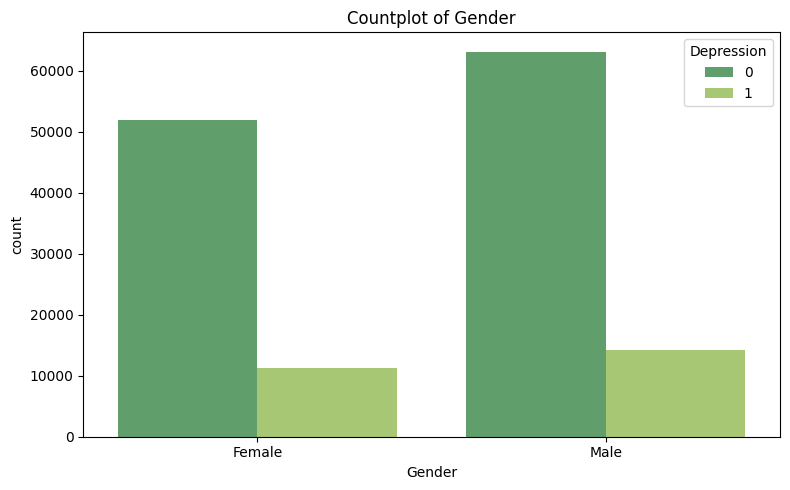

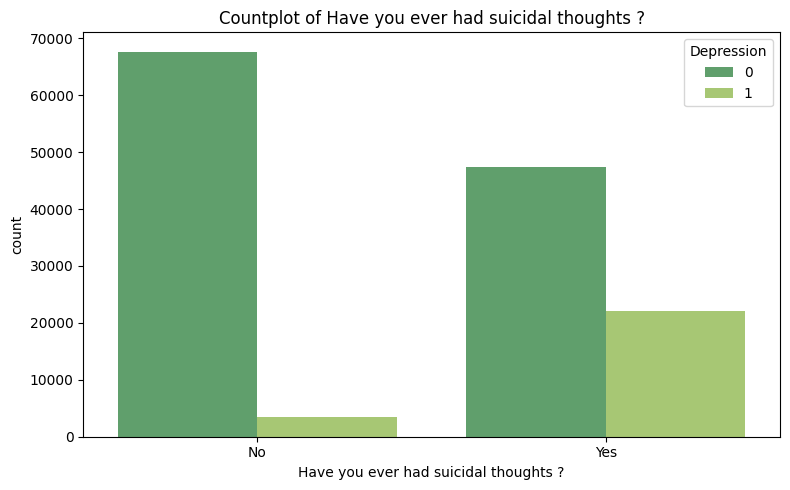

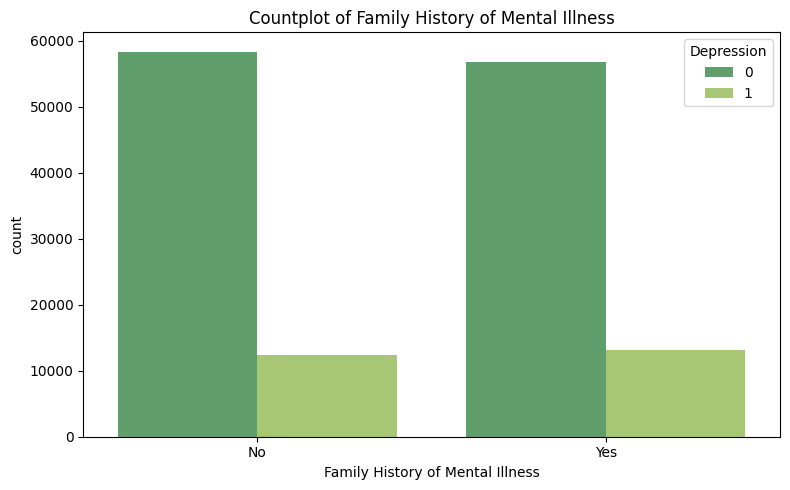

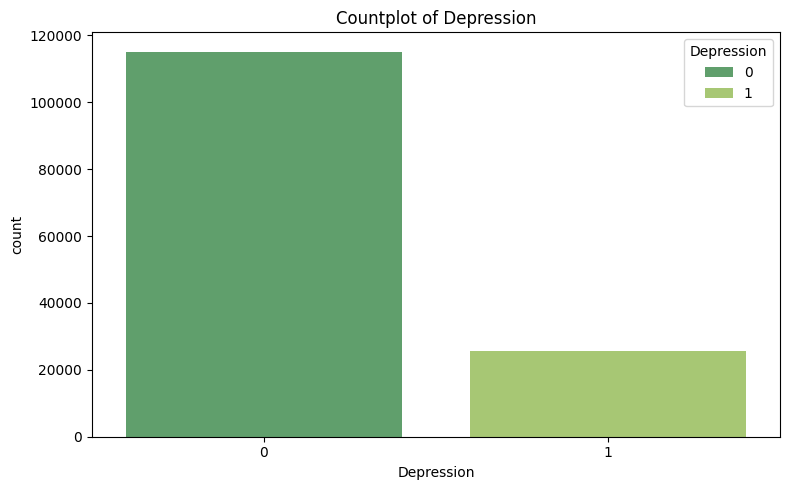

In [15]:
# Countplots for categorical columns with counts and percentages
categorical_columns_to_plot = ['Gender', 'Have you ever had suicidal thoughts ?', 'Family History of Mental Illness', 'Depression']

total = len(train)
for column in categorical_columns_to_plot:
    plt.figure(figsize=(8, 5))
    ax = sns.countplot(data=train, x=column, palette='summer', hue = 'Depression')
    plt.title(f'Countplot of {column}')

 # Add count and percentage labels centered lower inside each bar
    for p in ax.patches:
        count = int(p.get_height())
        percent = 100 * count / total

    plt.tight_layout()
    plt.show()


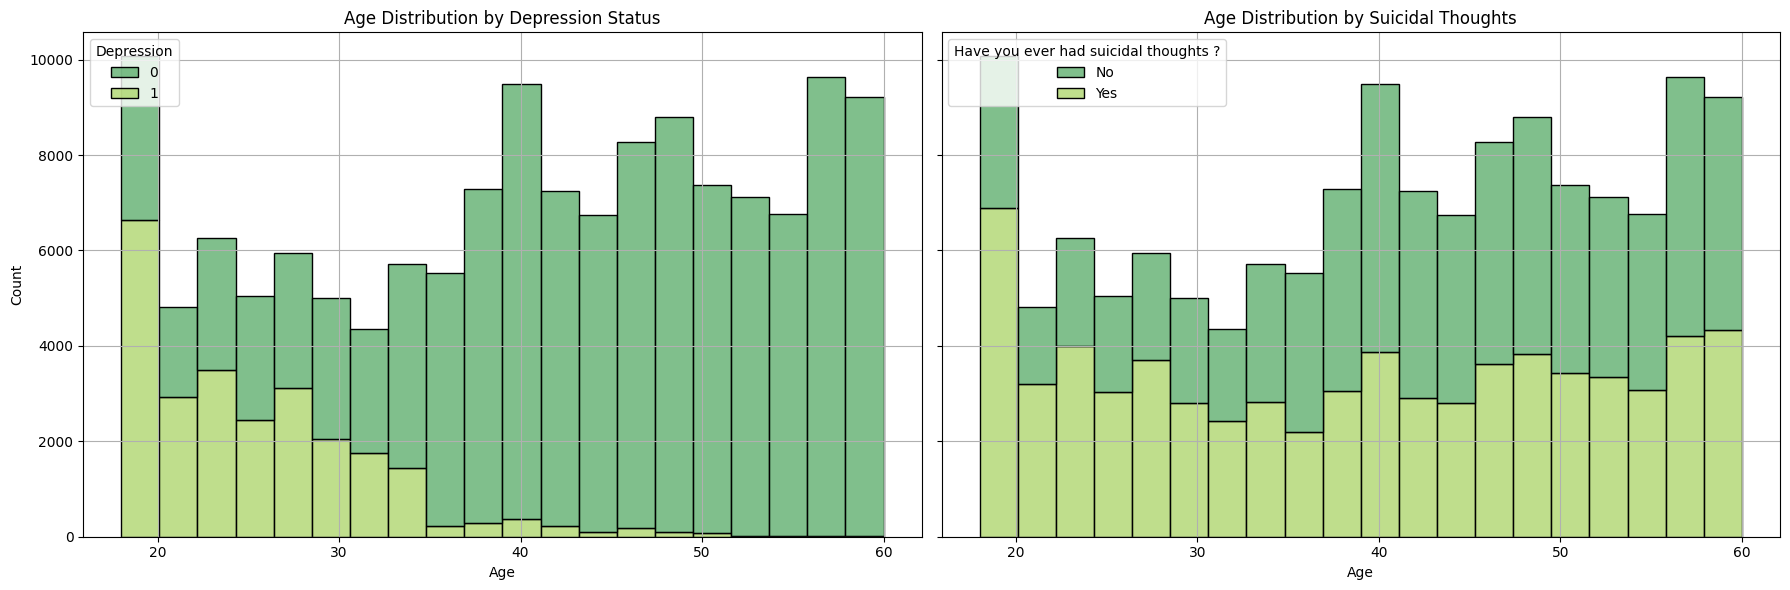

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the subplot with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(18, 6), sharey=True)

# 첫 번째 그래프: Depression 여부에 따른 연령 분포
sns.histplot(data=train, x='Age', hue='Depression', multiple='stack',
             bins=20, edgecolor='black', palette='summer', ax=axes[0])
axes[0].set_title('Age Distribution by Depression Status')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Count')
axes[0].grid(True)

# 두 번째 그래프: 자살 생각 여부에 따른 연령 분포
sns.histplot(data=train, x='Age', hue='Have you ever had suicidal thoughts ?',
             multiple='stack', bins=20, edgecolor='black', palette='summer', ax=axes[1])
axes[1].set_title('Age Distribution by Suicidal Thoughts')
axes[1].set_xlabel('Age')
axes[1].set_ylabel('')  # sharey=True 이므로 생략 가능
axes[1].grid(True)

# 레이아웃 조정
plt.tight_layout()
plt.show()


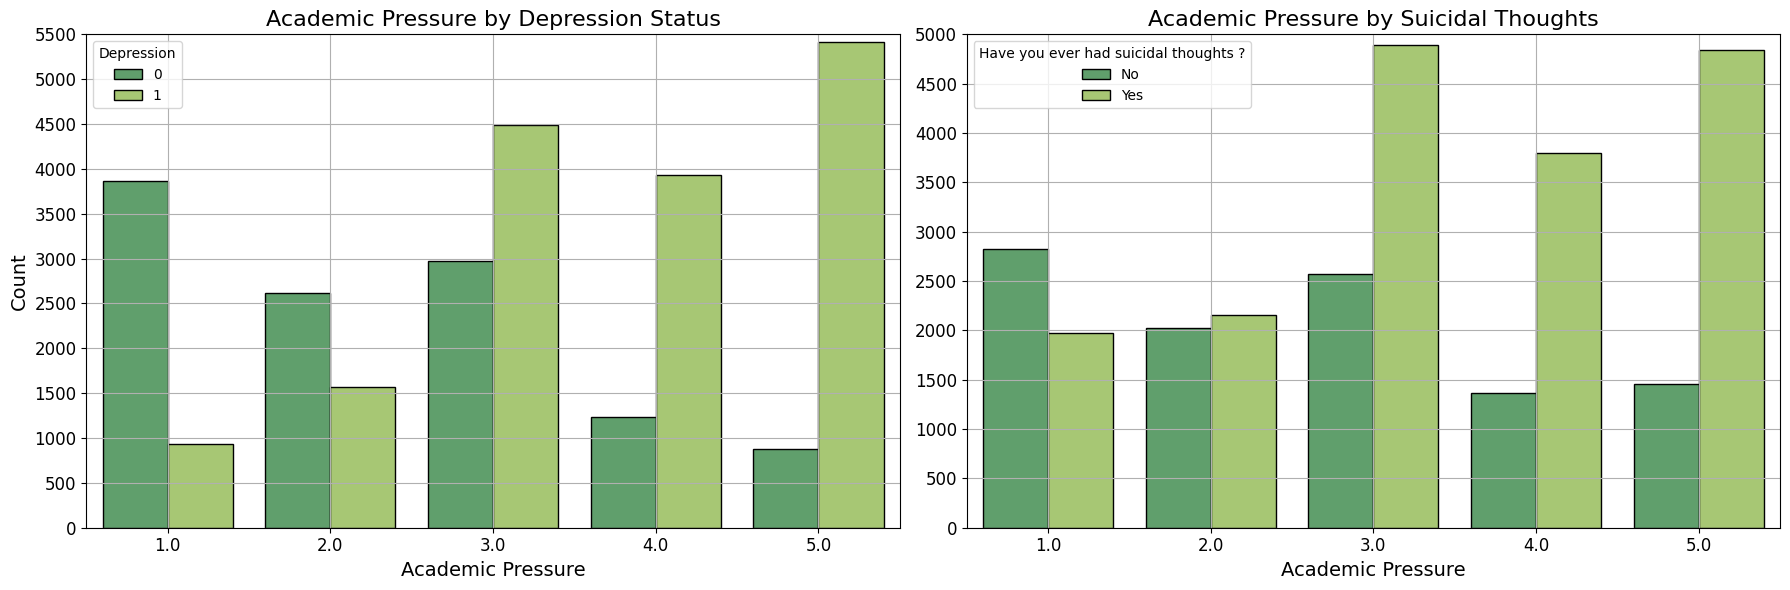

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set up the plots
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# 공통 설정
title_fontsize = 16
label_fontsize = 14
tick_fontsize = 12
ytick_step = 500  # ✅ y축 단위

# 첫 번째 그래프: 우울 여부
sns.countplot(data=train, x='Academic Pressure', hue='Depression',
              edgecolor='black', palette='summer', ax=axes[0])
axes[0].set_title('Academic Pressure by Depression Status', fontsize=title_fontsize)
axes[0].set_xlabel('Academic Pressure', fontsize=label_fontsize)
axes[0].set_ylabel('Count', fontsize=label_fontsize)
axes[0].tick_params(axis='x', labelsize=tick_fontsize)
axes[0].grid(True)

# 첫 번째 y축 범위 설정 (500 단위)
ymax0 = max([patch.get_height() for patch in axes[0].patches])
ymax0 = int(np.ceil(ymax0 / ytick_step)) * ytick_step
axes[0].set_ylim(0, ymax0)
axes[0].set_yticks(np.arange(0, ymax0 + 1, ytick_step))
axes[0].tick_params(axis='y', labelsize=tick_fontsize)

# 두 번째 그래프: 자살 생각 여부
sns.countplot(data=train, x='Academic Pressure', hue='Have you ever had suicidal thoughts ?',
              edgecolor='black', palette='summer', ax=axes[1])
axes[1].set_title('Academic Pressure by Suicidal Thoughts', fontsize=title_fontsize)
axes[1].set_xlabel('Academic Pressure', fontsize=label_fontsize)
axes[1].set_ylabel('', fontsize=label_fontsize)
axes[1].tick_params(axis='x', labelsize=tick_fontsize)
axes[1].grid(True)

# 두 번째 y축 범위 설정 (500 단위)
ymax1 = max([patch.get_height() for patch in axes[1].patches])
ymax1 = int(np.ceil(ymax1 / ytick_step)) * ytick_step
axes[1].set_ylim(0, ymax1)
axes[1].set_yticks(np.arange(0, ymax1 + 1, ytick_step))
axes[1].tick_params(axis='y', labelsize=tick_fontsize)

# 레이아웃 정리
plt.tight_layout()
plt.show()


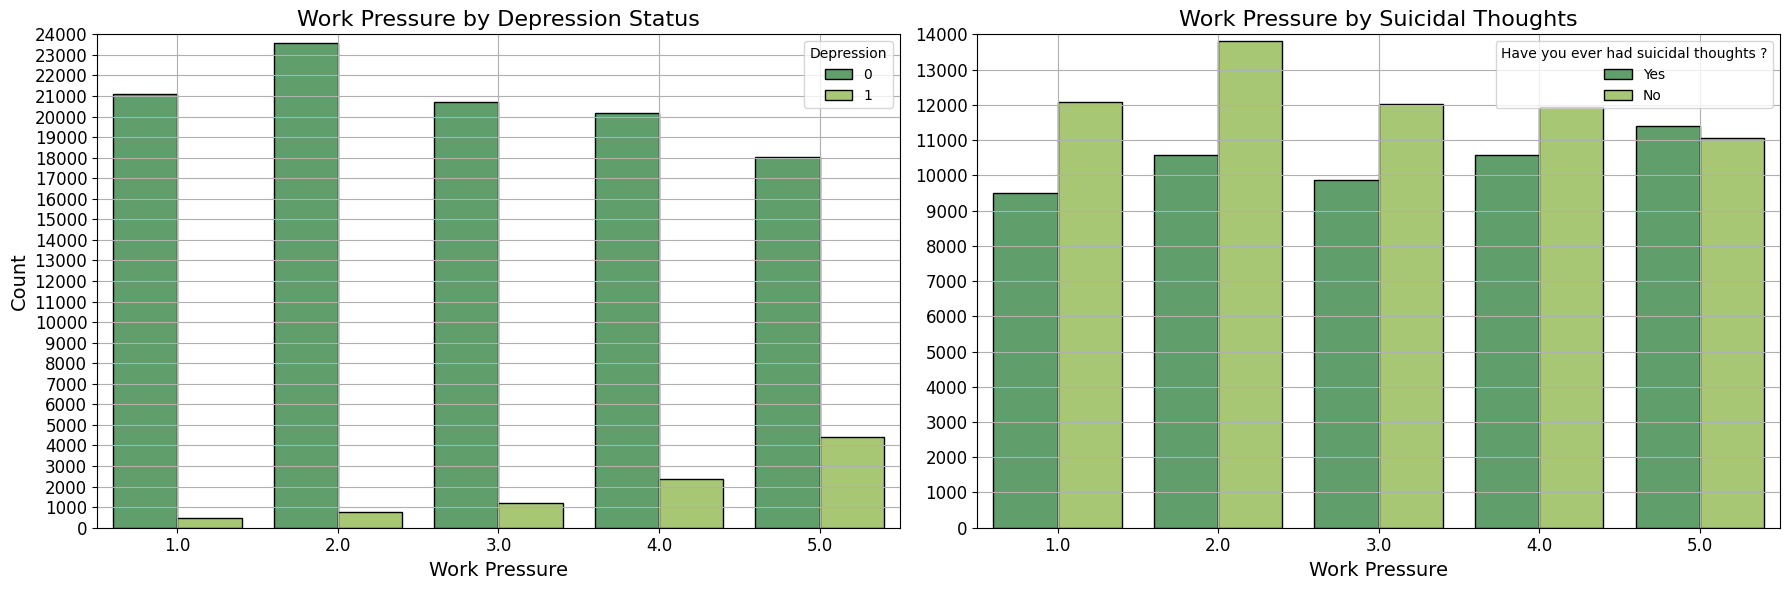

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set up the plots
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# 공통 설정
title_fontsize = 16
label_fontsize = 14
tick_fontsize = 12
ytick_step = 1000  # ✅ y축 단위

# 첫 번째 그래프: 우울 여부
sns.countplot(data=train, x='Work Pressure', hue='Depression',
              edgecolor='black', palette='summer', ax=axes[0])
axes[0].set_title('Work Pressure by Depression Status', fontsize=title_fontsize)
axes[0].set_xlabel('Work Pressure', fontsize=label_fontsize)
axes[0].set_ylabel('Count', fontsize=label_fontsize)
axes[0].tick_params(axis='x', labelsize=tick_fontsize)
axes[0].grid(True)

# 첫 번째 y축 범위 설정 (500 단위)
ymax0 = max([patch.get_height() for patch in axes[0].patches])
ymax0 = int(np.ceil(ymax0 / ytick_step)) * ytick_step
axes[0].set_ylim(0, ymax0)
axes[0].set_yticks(np.arange(0, ymax0 + 1, ytick_step))
axes[0].tick_params(axis='y', labelsize=tick_fontsize)

# 두 번째 그래프: 자살 생각 여부
sns.countplot(data=train, x='Work Pressure', hue='Have you ever had suicidal thoughts ?',
              edgecolor='black', palette='summer', ax=axes[1])
axes[1].set_title('Work Pressure by Suicidal Thoughts', fontsize=title_fontsize)
axes[1].set_xlabel('Work Pressure', fontsize=label_fontsize)
axes[1].set_ylabel('', fontsize=label_fontsize)
axes[1].tick_params(axis='x', labelsize=tick_fontsize)
axes[1].grid(True)

# 두 번째 y축 범위 설정 (500 단위)
ymax1 = max([patch.get_height() for patch in axes[1].patches])
ymax1 = int(np.ceil(ymax1 / ytick_step)) * ytick_step
axes[1].set_ylim(0, ymax1)
axes[1].set_yticks(np.arange(0, ymax1 + 1, ytick_step))
axes[1].tick_params(axis='y', labelsize=tick_fontsize)

# 레이아웃 정리
plt.tight_layout()
plt.show()


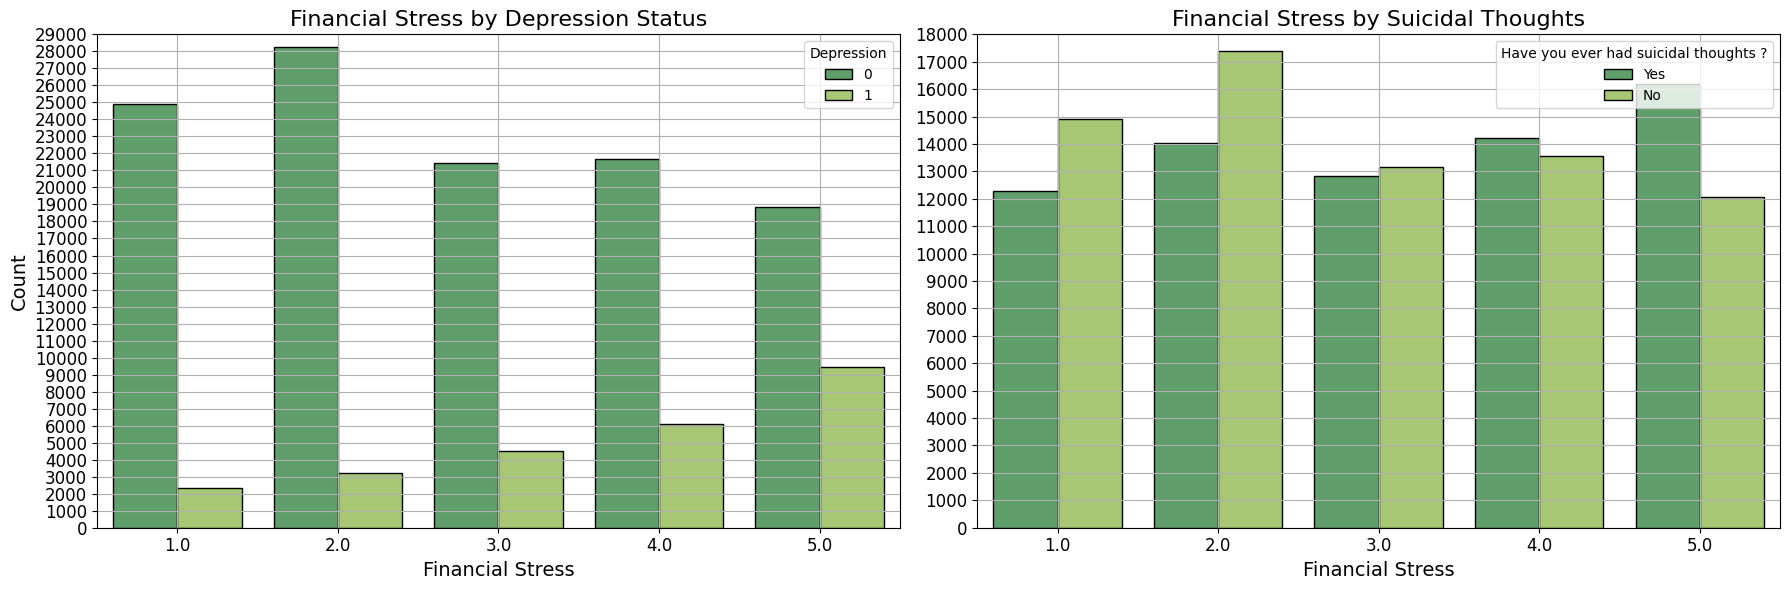

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 그래프 설정
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# 공통 설정값
title_fontsize = 16
label_fontsize = 14
tick_fontsize = 12
ytick_step = 1000  # ✅ y축 눈금 단위

# 첫 번째 그래프: Financial Stress vs Depression
sns.countplot(data=train, x='Financial Stress', hue='Depression',
              edgecolor='black', palette='summer', ax=axes[0])
axes[0].set_title('Financial Stress by Depression Status', fontsize=title_fontsize)
axes[0].set_xlabel('Financial Stress', fontsize=label_fontsize)
axes[0].set_ylabel('Count', fontsize=label_fontsize)
axes[0].tick_params(axis='x', labelsize=tick_fontsize)
axes[0].grid(True)

# 첫 번째 y축 설정
ymax0 = max([patch.get_height() for patch in axes[0].patches])
ymax0 = int(np.ceil(ymax0 / ytick_step)) * ytick_step
axes[0].set_ylim(0, ymax0)
axes[0].set_yticks(np.arange(0, ymax0 + 1, ytick_step))
axes[0].tick_params(axis='y', labelsize=tick_fontsize)

# 두 번째 그래프: Financial Stress vs Suicidal Thoughts
sns.countplot(data=train, x='Financial Stress', hue='Have you ever had suicidal thoughts ?',
              edgecolor='black', palette='summer', ax=axes[1])
axes[1].set_title('Financial Stress by Suicidal Thoughts', fontsize=title_fontsize)
axes[1].set_xlabel('Financial Stress', fontsize=label_fontsize)
axes[1].set_ylabel('', fontsize=label_fontsize)
axes[1].tick_params(axis='x', labelsize=tick_fontsize)
axes[1].grid(True)

# 두 번째 y축 설정
ymax1 = max([patch.get_height() for patch in axes[1].patches])
ymax1 = int(np.ceil(ymax1 / ytick_step)) * ytick_step
axes[1].set_ylim(0, ymax1)
axes[1].set_yticks(np.arange(0, ymax1 + 1, ytick_step))
axes[1].tick_params(axis='y', labelsize=tick_fontsize)

# 레이아웃 정리
plt.tight_layout()
plt.show()


#6. Feacture Engineering

## 1. 도시의 경우 무작위 값이 많아 삭제하엿음

In [20]:
print(train['City'].unique())

['Ludhiana' 'Varanasi' 'Visakhapatnam' 'Mumbai' 'Kanpur' 'Ahmedabad'
 'Thane' 'Nashik' 'Bangalore' 'Patna' 'Rajkot' 'Jaipur' 'Pune' 'Lucknow'
 'Meerut' 'Agra' 'Surat' 'Faridabad' 'Hyderabad' 'Srinagar' 'Ghaziabad'
 'Kolkata' 'Chennai' 'Kalyan' 'Nagpur' 'Vadodara' 'Vasai-Virar' 'Delhi'
 'Bhopal' 'Indore' 'Ishanabad' 'Vidhi' 'Ayush' 'Gurgaon' 'Krishna'
 'Aishwarya' 'Keshav' 'Harsha' 'Nalini' 'Aditya' 'Malyansh' 'Raghavendra'
 'Saanvi' 'M.Tech' 'Bhavna' 'Less Delhi' 'Nandini' 'M.Com' 'Plata'
 'Atharv' 'Pratyush' 'City' '3.0' 'Less than 5 Kalyan' 'MCA' 'Mira'
 'Moreadhyay' 'Morena' 'Ishkarsh' 'Kashk' 'Mihir' 'Vidya' 'Tolkata' 'Anvi'
 'Krinda' 'Ayansh' 'Shrey' 'Ivaan' 'Vaanya' 'Gaurav' 'Harsh' 'Reyansh'
 'Kashish' 'Kibara' 'Vaishnavi' 'Chhavi' 'Parth' 'Mahi' 'Tushar' 'MSc'
 'No' 'Rashi' 'ME' 'Molkata' 'Researcher' 'Kagan' 'Armaan' 'Ithal'
 'Nalyan' 'Dhruv' 'Galesabad' 'Itheg' 'Aaradhya' 'Pooja' 'Khushi'
 'Khaziabad' 'Jhanvi' 'Unirar']


In [21]:
train = train.drop(columns=['City'])

In [22]:


# 1. 연령 구간 설정
bins = [15, 20, 25, 30, 35, 40, 45, 50, 55, 60]
labels = list(range(1, len(bins)))  # [1, 2, ..., 9]

# 2. pd.cut으로 정수형 레이블 부여
train['Age_Encoded'] = pd.cut(
    train['Age'],
    bins=bins,
    labels=labels,
    right=True  # (a, b] 오른쪽 포함
)

# 3. NaN이 있을 수 있으므로 정수형으로 변환하기 전에 float으로 먼저 캐스팅 → NaN → 0
train['Age_Encoded'] = train['Age_Encoded'].astype(float).fillna(0).astype(int)

# 4. 확인
print(train['Age_Encoded'].value_counts().sort_index())

Age_Encoded
1    10069
2    13993
3    13065
4    12895
5    16345
6    17141
7    20511
8    17816
9    18855
Name: count, dtype: int64


In [23]:
train['Age'] = train['Age_Encoded']
train.drop(columns=['Age_Encoded'], inplace=True)

In [24]:
print(train['CGPA'].unique())

[    nan  8.97    5.9     7.03    5.59    8.13    5.7     9.54    8.04
  9.79    8.38    6.1     7.04    8.52    5.64    8.58    6.51    7.25
  7.83    9.93    8.74    6.73    5.57    8.59    7.1     6.08    5.74
  9.86    6.7     6.21    5.87    6.37    9.72    5.88    9.56    6.99
  5.24    9.21    7.85    6.95    5.86    7.92    9.66    8.94    9.71
  7.87    5.6     7.9     5.46    6.79    8.7     7.38    8.5     7.09
  9.82    8.89    7.94    9.11    6.75    7.53    9.49    9.01    7.64
  5.27    6.      9.44    5.75    7.51    9.05    6.38    8.95    9.88
  5.32    6.27    7.7     8.1     9.59    8.96    5.51    7.43    8.79
  9.95    5.37    6.86    8.32    9.74    5.66    7.48    8.23    8.81
  6.03    5.56    5.68    5.14    7.61    6.17    8.17    9.87    8.75
  6.16    9.5     7.99    5.67    8.92    6.19    5.76    6.25    5.11
  5.58    5.65    9.89    8.03    6.61    9.41    8.64    7.21    8.28
  6.04    9.13    8.08    9.96    5.12    8.35    7.07    9.6     9.24
  8.54

In [25]:
import numpy as np

# 0 이상 10 이하를 1점 단위로 나눔 → 총 10구간
bins = np.arange(0, 11, 1)  # [0, 1, 2, ..., 10]
labels = list(range(len(bins) - 1))  # [0, 1, 2, ..., 9]

# 구간 인코딩: [0,1), [1,2), ..., [9,10)
train['CGPA_Encoded'] = pd.cut(
    train['CGPA'],
    bins=bins,
    labels=labels,
    right=False,
    include_lowest=True  # 0 포함
)

# NaN → 0 처리 후 정수 변환
train['CGPA_Encoded'] = train['CGPA_Encoded'].astype(float).fillna(0).astype(int)

# 확인
print(train['CGPA_Encoded'].value_counts().sort_index())

CGPA_Encoded
0    112855
5      5403
6      4309
7      5543
8      6406
9      6174
Name: count, dtype: int64


In [26]:
train['CGPA'] = train['CGPA_Encoded']
train.drop(columns=['CGPA_Encoded'], inplace=True)

# Gender, Working Professional or Student, Have you ever had suicidal thoughts ?, Family History of Mental Illness



In [27]:
Suicide_map = {'Yes': 1, 'No': 0}
train['Have you ever had suicidal thoughts ? Encoded'] = train['Have you ever had suicidal thoughts ?'].map(Suicide_map)

Family_map = {'Yes': 1, 'No': 0}
train['Family History of Mental Illness Encoded'] = train['Family History of Mental Illness'].map(Family_map)

train['Have you ever had suicidal thoughts ?'] = train['Have you ever had suicidal thoughts ?'].map(Suicide_map)
train['Family History of Mental Illness Encoded'] = train['Family History of Mental Illness'].map(Family_map)

train['Working Professional'] = (train['Working Professional or Student'] == 'Working Professional').astype(int)
train['Student'] = (train['Working Professional or Student'] == 'Student').astype(int)
train['Female'] = (train['Gender'] == 'Female').astype(int)
train['Male'] = (train['Gender'] == 'Male').astype(int)


In [28]:
print(train['Have you ever had suicidal thoughts ? Encoded'].unique())
print(train['Family History of Mental Illness Encoded'].unique())

[0 1]
[0 1]


In [29]:
train['Have you ever had suicidal thoughts ? Encoded'][train['Have you ever had suicidal thoughts ?'].isna()].unique()

array([], dtype=int64)

In [30]:
train['Have you ever had suicidal thoughts ?'] = train['Have you ever had suicidal thoughts ? Encoded']
train['Family History of Mental Illness'] = train['Family History of Mental Illness Encoded']
train = train.drop(columns=[
    'Have you ever had suicidal thoughts ? Encoded',
    'Family History of Mental Illness Encoded'
])

# Profession

In [31]:
print(train['Profession'].unique())

['Chef' 'Teacher' nan 'Business Analyst' 'Finanancial Analyst' 'Chemist'
 'Electrician' 'Software Engineer' 'Data Scientist' 'Plumber'
 'Marketing Manager' 'Accountant' 'Entrepreneur' 'HR Manager'
 'UX/UI Designer' 'Content Writer' 'Educational Consultant'
 'Civil Engineer' 'Manager' 'Pharmacist' 'Financial Analyst' 'Architect'
 'Mechanical Engineer' 'Customer Support' 'Consultant' 'Judge'
 'Researcher' 'Pilot' 'Graphic Designer' 'Travel Consultant'
 'Digital Marketer' 'Lawyer' 'Research Analyst' 'Sales Executive' 'Doctor'
 'Unemployed' 'Investment Banker' 'Family Consultant' 'B.Com' 'BE'
 'Student' 'Yogesh' 'Dev' 'MBA' 'LLM' 'BCA' 'Academic' 'Profession'
 'FamilyVirar' 'City Manager' 'BBA' 'Medical Doctor'
 'Working Professional' 'MBBS' 'Patna' 'Unveil' 'B.Ed' 'Nagpur' 'Moderate'
 'M.Ed' 'Analyst' 'Pranav' 'Visakhapatnam' 'PhD' 'Yuvraj']


In [32]:
# Feature engineering: map 'Profession' to simplified categories (1: noise, 2: unemployed/student, 3: valid professions)
profession_map = {
    'nan': 0,
    # Noise or invalid entries
    'Yogesh': 1, 'Dev': 1, 'Patna': 1, 'Pranav': 1, 'Unveil': 1, 'Nagpur': 1,
    'Visakhapatnam': 1, 'Yuvraj': 1, 'Moderate': 1,
    'Profession': 1, 'FamilyVirar': 1,

    # Unemployed or student - 학위만 써낸 경우는 학생으로 간주하엿음
    'Unemployed': 2, 'Student': 2, 'Working Professional': 2, 'MBA': 2, 'LLM': 2, 'PhD': 2, 'BBA': 2,
    'B.Ed': 2, 'B.Com': 2, 'BCA': 2, 'BE': 2, 'M.Ed': 2,

    # Valid professions
    'Chef': 3, 'Teacher': 3, 'Electrician': 3, 'Plumber': 3, 'Customer Support': 3,
    'UX/UI Designer': 3, 'Educational Consultant': 3, 'City Manager': 3, 'Travel Consultant': 3, 'Graphic Designer': 3, 'Digital Marketer': 3,
    'Manager': 3, 'Content Writer': 3, 'Sales Executive': 3, 'Marketing Manager': 3, 'HR Manager': 3,

    #Knowledge workers
    'Doctor': 4, 'Medical Doctor': 4, 'Lawyer': 4,
    'Judge': 4, 'Pharmacist': 4, 'Pilot': 4, 'Civil Engineer': 4, 'Architect': 4, 'Mechanical Engineer': 4,
    'Financial Analyst': 4, 'Software Engineer': 4, 'Academic': 1,
    'Accountant': 4, 'Consultant': 2, 'Research Analyst': 4,
    'Investment Banker': 4, 'Business Analyst': 4, 'Researcher': 4
}

train['Profession Encoded'] = train['Profession'].map(profession_map)

In [33]:
print(train['Profession Encoded'].unique())

[ 3. nan  4.  2.  1.]


In [34]:
train['Profession Encoded'][train['Profession'].isna()].unique()

array([nan])

In [35]:
train['Profession'] = train['Profession Encoded'].astype(float).fillna(0).astype(int)
train = train.drop(columns=['Profession Encoded'])

# Sleep Duration

In [36]:
print(train['Sleep Duration'].unique())

['More than 8 hours' 'Less than 5 hours' '5-6 hours' '7-8 hours'
 'Sleep_Duration' '1-2 hours' '6-8 hours' '4-6 hours' '6-7 hours'
 '10-11 hours' '8-9 hours' '40-45 hours' '9-11 hours' '2-3 hours'
 '3-4 hours' 'Moderate' '55-66 hours' '4-5 hours' '9-6 hours' '1-3 hours'
 'Indore' '45' '1-6 hours' '35-36 hours' '8 hours' 'No' '10-6 hours'
 'than 5 hours' '49 hours' 'Unhealthy' 'Work_Study_Hours' '3-6 hours'
 '45-48 hours' '9-5' 'Pune' '9-5 hours']


In [37]:
# Feature engineering: map 'Sleep Duration' to numeric categories
sleep_map = {
    'Less than 5 hours': 1,
    '1-2 hours': 1,
    '1-3 hours': 1,
    '2-3 hours': 1,
    '3-4 hours': 2,
    '4-5 hours': 2,
    '4-6 hours': 3,
    '5-6 hours': 3,
    '6-7 hours': 3,
    '6-8 hours': 4,
    '7-8 hours': 4,
    '8-9 hours': 5,
    '9-11 hours': 5,
    '10-11 hours': 5,
    'More than 8 hours': 6,
    '9-6 hours': 0,
    '10-6 hours': 4,
    '1-6 hours': 2,
    'Sleep_Duration': 0,
    'Work_Study_Hours': 0,
    'Moderate': 3,
    'Unhealthy': 0,
    'No': 0,
    'Indore': 0,
    'Pune': 0,
    '45': 6,
    '49 hours': 6,
    '35-36 hours': 6,
    '45-48 hours': 6,
    '9-5': 5,
    '9-5 hours': 5
}

train['Sleep Duration Encoded'] = train['Sleep Duration'].map(sleep_map)

In [38]:
print(train['Sleep Duration Encoded'].unique())

[ 6.  1.  3.  4.  0.  5. nan  2.]


In [39]:
train['Sleep Duration Encoded'][train['Sleep Duration'].isna()].unique()

array([], dtype=float64)

In [40]:
train['Sleep Duration'] = train['Sleep Duration Encoded']
train = train.drop(columns=['Sleep Duration Encoded'])

# Dietary Habits

In [41]:
print(train['Dietary Habits'].unique())

['Healthy' 'Unhealthy' 'Moderate' 'Yes' 'Pratham' 'BSc' 'Gender' '3'
 'More Healthy' 'Less than Healthy' 'Mihir' '1.0' 'Hormonal' 'Electrician'
 'No Healthy' 'Less Healthy' 'M.Tech' 'Vegas' 'No' 'Male' 'Indoor'
 'Class 12' '2']


In [42]:
# Feature engineering: mapping 'Dietary Habits' to numeric categories
Diet = {
    '2': 0, 'Class 12': 0, 'Male': 0, 'Indoor': 0, 'M.Tech': 0, 'Vegas': 0,
    'Mihir': 0, '1.0': 1, 'Hormonal': 0, 'Electrician': 0, 'Pratham': 0, 'BSc': 0, 'Gender': 0, '3': 3,

    'No': 1, 'No Healthy': 1, 'Unhealthy': 1,
    'Less Healthy': 2, 'Less than Healthy': 2,
    'Moderate': 3,
    'Healthy': 4, 'Yes': 4,
    'More Healthy': 5
}

train['Dietary Habits Encoded'] = train['Dietary Habits'].map(Diet)

In [43]:
print(train['Dietary Habits Encoded'].unique())

[4 1 3 0 5 2]


In [44]:
# 아직 인코딩되지 않은 이름/값들
train['Dietary Habits Encoded'][train['Dietary Habits'].isna()].unique()

array([], dtype=int64)

In [45]:
train['Dietary Habits'] = train['Dietary Habits Encoded']
train = train.drop(columns=['Dietary Habits Encoded'])

# Degree

In [46]:
print(train['Degree'].unique())

['BHM' 'LLB' 'B.Pharm' 'BBA' 'MCA' 'MD' 'BSc' 'ME' 'B.Arch' 'BCA' 'BE'
 'MA' 'B.Ed' 'B.Com' 'MBA' 'M.Com' 'MHM' 'BA' 'Class 12' 'M.Tech' 'PhD'
 'M.Ed' 'MSc' 'B.Tech' 'LLM' 'MBBS' 'M.Pharm' 'UX/UI Designer' 'MPA' 'BH'
 'Nalini' 'BEd' 'B.Sc' 'Veda' 'Bhopal' 'S.Tech' 'Degree' '20' 'Class 11'
 'H_Pharm' 'M' 'P.Com' 'BPharm' 'Business Analyst' 'M.Arch' 'LL.Com'
 'Data Scientist' 'MPharm' 'L.Ed' 'P.Pharm' 'Kalyan' 'Unite' 'BArch'
 'HR Manager' 'Badhya' 'S.Pharm' 'LLBA' 'Vrinda' 'M. Business Analyst'
 'Bhavesh' '0' 'LLCom' '29' 'MTech' 'Vivaan' 'BPA' 'Plumber' '5.61' 'Brit'
 'B.03' 'Ritik' '5.56' 'MEd' 'B' 'B BA' '7.06' 'B.B.Arch' 'ACA' 'Brithika'
 'CGPA' '24' 'M_Tech' 'Pihu' 'BB' 'Jhanvi' 'LLTech' 'Aarav' 'Entrepreneur'
 '8.56' 'LHM' 'Lata' 'S.Arch' 'Marsh' 'HCA' '5.88' 'B.Student' 'LL B.Ed'
 'M.S' 'Navya' 'Mahika' 'K.Ed' 'B.3.79' 'Mthanya' 'Working Professional'
 'Esha' 'LLS' 'LLEd' 'E.Tech' 'Doctor' 'N.Pharm' 'LCA' 'B B.Com' 'RCA'
 'Mihir' 'Advait']


In [47]:
# Feature engineering: map 'Degree' to academic levels (0: noise/unknown, 1: high school or below, 2: bachelor's, 3: master's, 4: doctorate/medical)
degree_map = {
    # Noise / invalid / misc
    '0': 0, '20': 0, '24': 0, '29': 0, '5.56': 0, '5.61': 0, '5.88': 0, '7.06': 0, '8.56': 0,
    'Brit': 0, 'CGPA': 0, 'Esha': 0, 'Mihir': 0, 'Navya': 0, 'Advait': 0, 'Jhanvi': 0, 'Aarav': 0,
    'Vivaan': 0, 'Mahika': 0, 'Pihu': 0, 'Lata': 0, 'Veda': 0, 'Nalini': 0, 'Working Professional': 0,
    'Business Analyst': 0, 'Doctor': 0, 'Entrepreneur': 0, 'Ritik': 0, 'Bhopal': 0, 'Indore': 0, 'Pune': 0,
    'Bhavesh': 0, 'Vrinda': 0, 'Mthanya': 0,
    'H_Pharm': 0, 'P.Com': 0, 'P.Pharm': 0, 'S.Tech': 0, 'S.Arch': 0, 'S.Pharm': 0,
    'K.Ed': 0, 'N.Pharm': 0, 'RCA': 0, 'ACA': 0, 'Marsh': 0, 'Brithika': 0, 'Badhya': 0,
    'ME': 0, 'MBBS': 4, 'UX/UI Designer': 0, 'BH': 0, 'Degree': 0, 'M': 0,
    'Data Scientist': 0, 'Kalyan': 0, 'Unite': 0, 'HR Manager': 0, 'Plumber': 0, 'B': 0,
    'M_Tech': 0, 'BB': 0, 'HCA': 0, 'B.Student': 0, 'E.Tech': 0,

    # High school or below
    'Class 11': 1, 'Class 12': 1, 'Diploma': 1, 'High School': 1,

    # Bachelor's
    'BA': 2, 'B.A': 2, 'BSc': 2, 'B.Sc': 2, 'B.Com': 2, 'BEd': 2, 'B.Ed': 2, 'BBA': 2, 'BHM': 2,
    'B.Arch': 2, 'BCA': 2, 'BE': 2, 'B.Tech': 2, 'BPharm': 2, 'B.Pharm': 2, 'BArch': 2, 'BStudent': 2,
    'B.B.Arch': 2, 'B BA': 2, 'B.03': 2, 'B.3.79': 2, 'BPA': 2, 'B B.Com': 2,

    # Master's
    'MA': 3, 'M.A': 3, 'MBA': 3, 'M.Com': 3, 'MHM': 3, 'M.Tech': 3, 'MTech': 3, 'MCA': 3,
    'MSc': 3, 'M.Sc': 3, 'MPA': 3, 'MPharm': 3, 'M.Pharm': 3, 'M.S': 3,
    'M.Ed': 3, 'MEd': 3, 'M.Arch': 3, 'M. Business Analyst': 3,

    # Doctorate or medical
    'PhD': 4, 'Doctorate': 4, 'MD': 4, 'LLB': 4, 'LLM': 4, 'LL.Com': 4, 'LLCom': 4, 'LLBA': 4, 'LLTech': 4,
    'LHM': 4, 'LCA': 4, 'LLEd': 4, 'L.Ed': 4, 'LL B.Ed': 4, 'LLS': 4
}

train['Degree Encoded'] = train['Degree'].map(degree_map)


In [48]:
print(train['Degree Encoded'].unique())

[2 4 3 0 1]


In [49]:
# 아직 인코딩되지 않은 이름/값들
train['Degree'][train['Degree Encoded'].isna()].unique

train['Degree'] = train['Degree Encoded']

In [50]:
train = train.drop(columns=['Degree Encoded'])

In [51]:
train.drop(['Gender', 'Working Professional or Student'], axis=1, inplace=True)

# Student VS Professional

In [52]:
train.head(3)

,Age,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,Working Professional,Student,Female,Male
0,7,3,NaN,5.0,0,NaN,2.0,6.0,4,2,0,1.0,2.0,0,0,1,0,1,0
1,3,3,NaN,4.0,0,NaN,3.0,1.0,1,4,1,7.0,3.0,0,1,1,0,0,1
2,4,0,5.0,NaN,8,2.0,NaN,3.0,4,2,1,3.0,1.0,0,1,0,1,0,1


In [53]:
# ▶️ 조건에 따라 각 feature 마스킹 (학생/직장인 별 적용, NaN은 0으로 대체)
train['Academic Pressure'] = (train['Student'] * train['Academic Pressure']).fillna(0)
train['Job Satisfaction'] = (train['Working Professional'] * train['Job Satisfaction']).fillna(0)
train['Work Pressure'] = (train['Working Professional'] * train['Work Pressure']).fillna(0)
train['Study Satisfaction'] = (train['Student'] * train['Study Satisfaction']).fillna(0)

for col in train.columns:
    if train[col].dtype.name == 'category':
        train[col] = train[col].astype(str)

train = train.fillna(0).astype(int)

In [54]:
 train.dtypes

,0
Age,int64
Profession,int64
Academic Pressure,int64
Work Pressure,int64
CGPA,int64
Study Satisfaction,int64
Job Satisfaction,int64
Sleep Duration,int64
Dietary Habits,int64
Degree,int64


In [55]:
train.head(5)

,Age,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,Working Professional,Student,Female,Male
0,7,3,0,5,0,0,2,6,4,2,0,1,2,0,0,1,0,1,0
1,3,3,0,4,0,0,3,1,1,4,1,7,3,0,1,1,0,0,1
2,4,0,5,0,8,2,0,3,4,2,1,3,1,0,1,0,1,0,1
3,2,3,0,5,0,0,1,1,3,2,1,10,1,1,1,1,0,0,1
4,3,4,0,1,0,0,1,3,1,2,1,9,4,1,0,1,0,1,0


In [56]:
train['Performance_Pressure'] = train['Work Pressure'] + train['Academic Pressure']
train['Performance_Satisfaction'] = train['Job Satisfaction'] + train['Study Satisfaction']

train.drop(['Work Pressure', 'Academic Pressure', 'Job Satisfaction', 'Study Satisfaction'], axis=1, inplace=True)

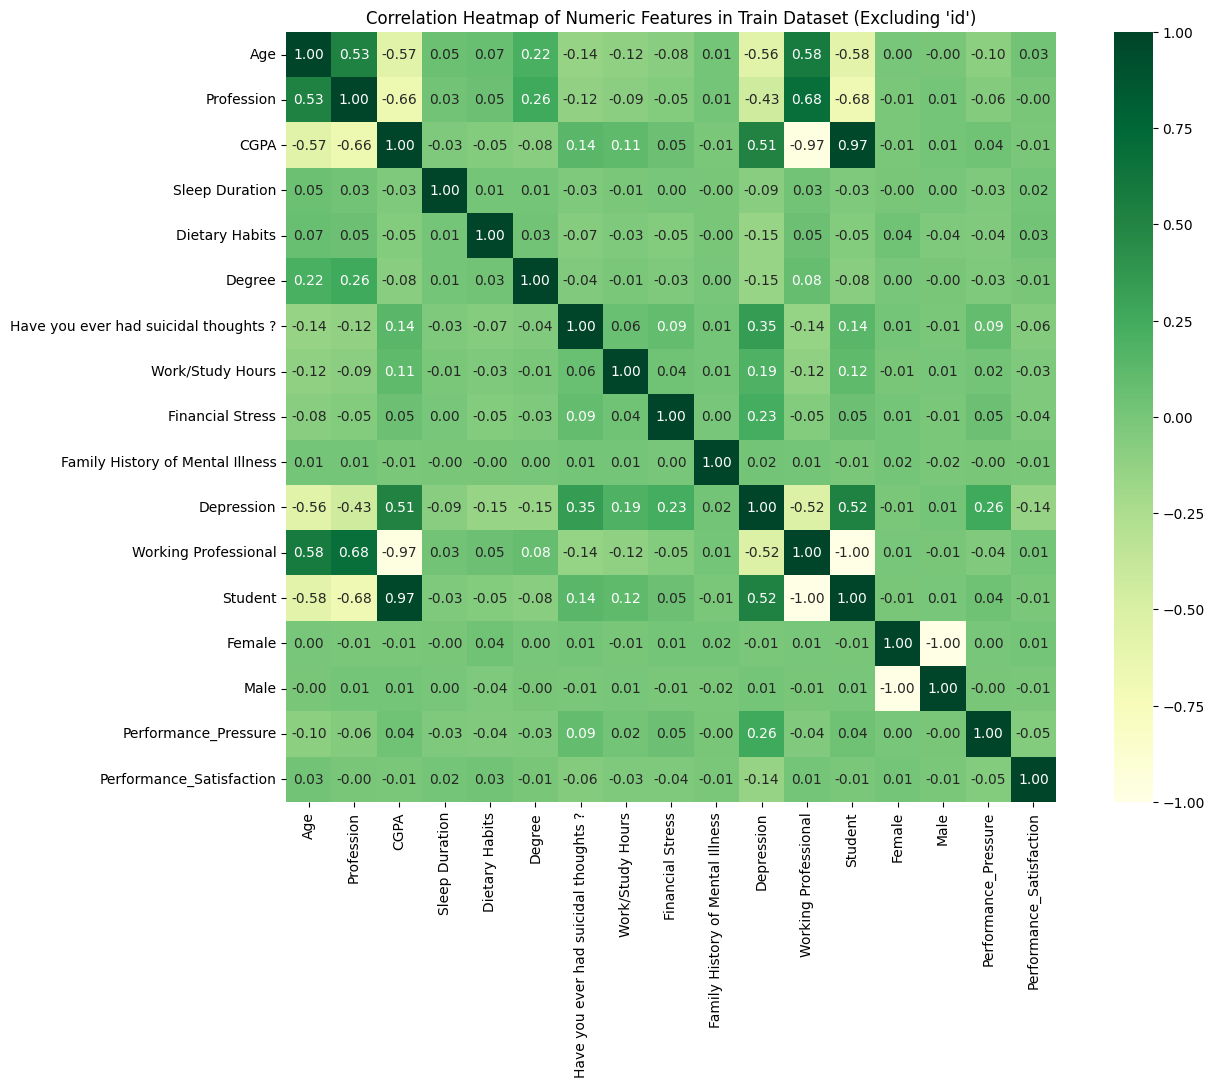

In [57]:
# 숫자형 컬럼만 선택한 후 'id' 컬럼 제거
numeric_train = train.select_dtypes(include=['number'])

# 상관계수 행렬 계산
corr_matrix = numeric_train.corr()

# 히트맵 시각화
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="YlGn", square=True)
plt.title("Correlation Heatmap of Numeric Features in Train Dataset (Excluding 'id')")
plt.show()


## NULL 값이 많은 이유가 student, professional이 각자의 만족도 조사면 하였기 떄문이라고 추론할 수 있음

In [58]:
train.head()

,Age,Profession,CGPA,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,Working Professional,Student,Female,Male,Performance_Pressure,Performance_Satisfaction
0,7,3,0,6,4,2,0,1,2,0,0,1,0,1,0,5,2
1,3,3,0,1,1,4,1,7,3,0,1,1,0,0,1,4,3
2,4,0,8,3,4,2,1,3,1,0,1,0,1,0,1,5,2
3,2,3,0,1,3,2,1,10,1,1,1,1,0,0,1,5,1
4,3,4,0,3,1,2,1,9,4,1,0,1,0,1,0,1,1


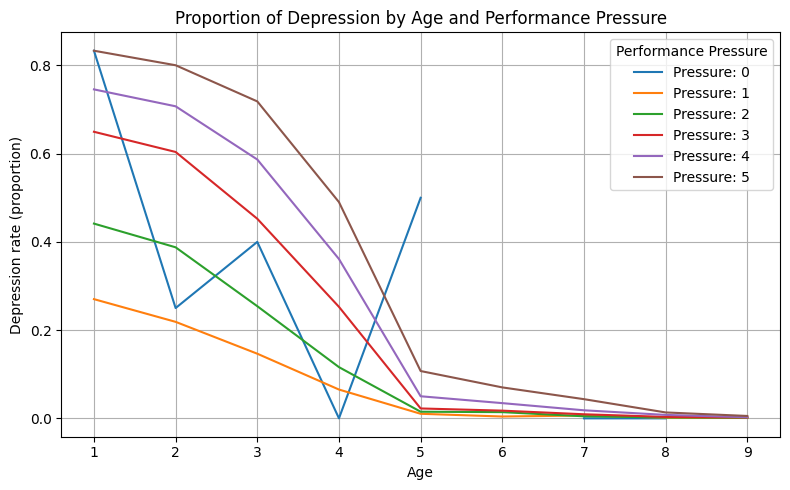

In [59]:
import matplotlib.pyplot as plt

grouped = train.groupby(['Age', 'Performance_Pressure'])['Depression'].mean().reset_index()

# 피벗 테이블로 변환
pivot_df = grouped.pivot(index='Age', columns='Performance_Pressure', values='Depression')

# 선그래프 그리기
plt.figure(figsize=(8, 5))
for pressure_level in pivot_df.columns:
    plt.plot(pivot_df.index, pivot_df[pressure_level], label=f'Pressure: {pressure_level}')

plt.xlabel('Age')
plt.ylabel('Depression rate (proportion)')
plt.title('Proportion of Depression by Age and Performance Pressure')
plt.legend(title='Performance Pressure')
plt.grid(True)
plt.tight_layout()
plt.show()

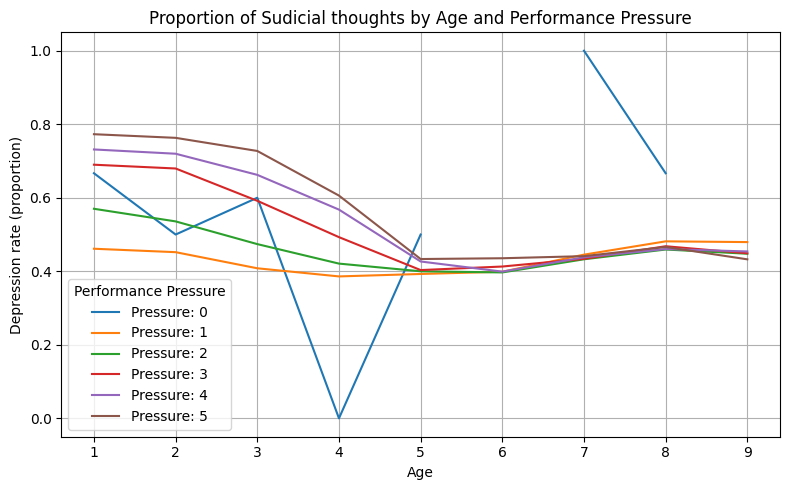

In [60]:
import matplotlib.pyplot as plt

grouped = train.groupby(['Age', 'Performance_Pressure'])['Have you ever had suicidal thoughts ?'].mean().reset_index()

# 피벗 테이블로 변환
pivot_df = grouped.pivot(index='Age', columns='Performance_Pressure', values='Have you ever had suicidal thoughts ?')

# 선그래프 그리기
plt.figure(figsize=(8, 5))
for pressure_level in pivot_df.columns:
    plt.plot(pivot_df.index, pivot_df[pressure_level], label=f'Pressure: {pressure_level}')

plt.xlabel('Age')
plt.ylabel('Depression rate (proportion)')
plt.title('Proportion of Sudicial thoughts by Age and Performance Pressure')
plt.legend(title='Performance Pressure')
plt.grid(True)
plt.tight_layout()
plt.show()

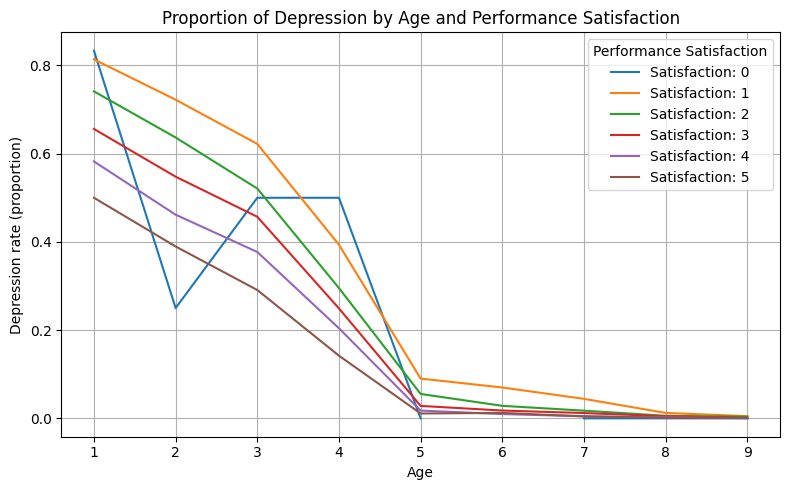

In [61]:

grouped = train.groupby(['Age', 'Performance_Satisfaction'])['Depression'].mean().reset_index()

# 피벗 테이블로 변환
pivot_df = grouped.pivot(index='Age', columns='Performance_Satisfaction', values='Depression')

# 선그래프 그리기
plt.figure(figsize=(8, 5))
for pressure_level in pivot_df.columns:
    plt.plot(pivot_df.index, pivot_df[pressure_level], label=f'Satisfaction: {pressure_level}')

plt.xlabel('Age')
plt.ylabel('Depression rate (proportion)')
plt.title('Proportion of Depression by Age and Performance Satisfaction')
plt.legend(title='Performance Satisfaction')
plt.grid(True)
plt.tight_layout()
plt.show()

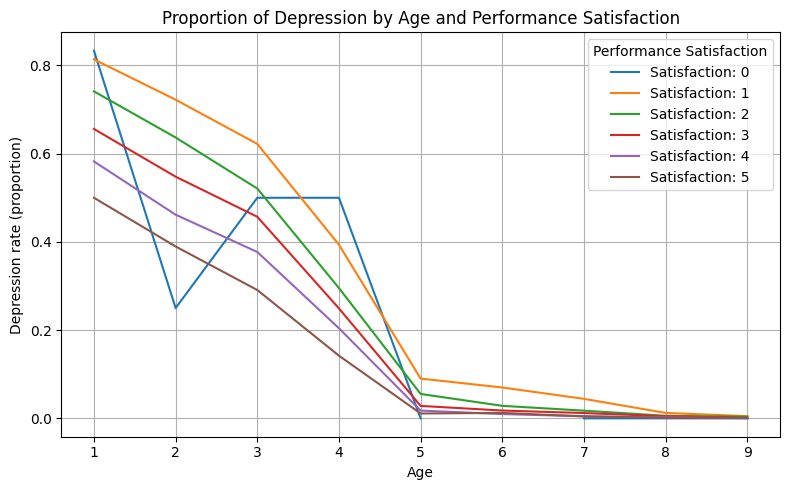

In [62]:

grouped = train.groupby(['Age', 'Performance_Satisfaction'])['Depression'].mean().reset_index()

# 피벗 테이블로 변환
pivot_df = grouped.pivot(index='Age', columns='Performance_Satisfaction', values='Depression')

# 선그래프 그리기
plt.figure(figsize=(8, 5))
for pressure_level in pivot_df.columns:
    plt.plot(pivot_df.index, pivot_df[pressure_level], label=f'Satisfaction: {pressure_level}')

plt.xlabel('Age')
plt.ylabel('Depression rate (proportion)')
plt.title('Proportion of Depression by Age and Performance Satisfaction')
plt.legend(title='Performance Satisfaction')
plt.grid(True)
plt.tight_layout()
plt.show()

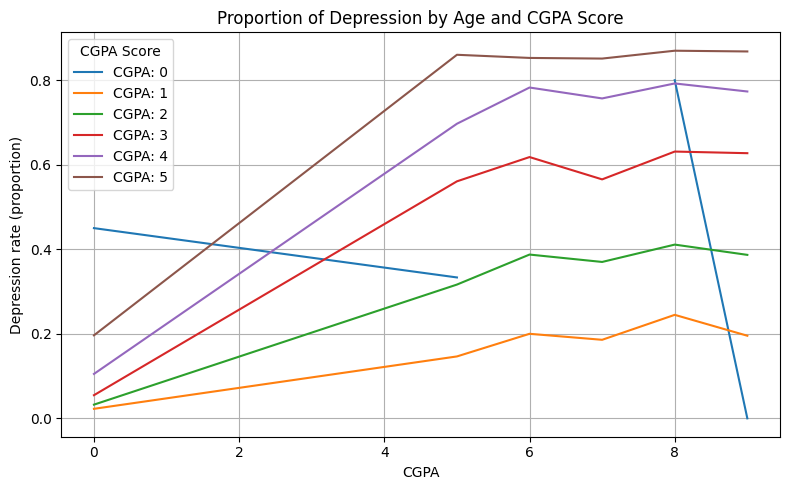

In [63]:
grouped = train.groupby(['CGPA', 'Performance_Pressure'])['Depression'].mean().reset_index()

# 피벗 테이블로 변환
pivot_df = grouped.pivot(index='CGPA', columns='Performance_Pressure', values='Depression')

# 선그래프 그리기
plt.figure(figsize=(8, 5))
for pressure_level in pivot_df.columns:
    plt.plot(pivot_df.index, pivot_df[pressure_level], label=f'CGPA: {pressure_level}')

plt.xlabel('CGPA')
plt.ylabel('Depression rate (proportion)')
plt.title('Proportion of Depression by Age and CGPA Score')
plt.legend(title='CGPA Score')
plt.grid(True)
plt.tight_layout()
plt.show()


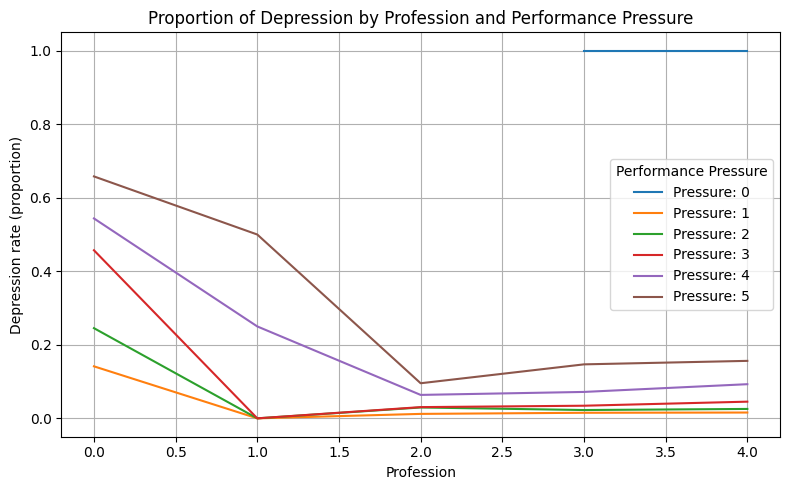

In [64]:
grouped = train.groupby(['Profession', 'Performance_Pressure'])['Depression'].mean().reset_index()

# 피벗 테이블로 변환
pivot_df = grouped.pivot(index='Profession', columns='Performance_Pressure', values='Depression')

# 선그래프 그리기
plt.figure(figsize=(8, 5))
for pressure_level in pivot_df.columns:
    plt.plot(pivot_df.index, pivot_df[pressure_level], label=f'Pressure: {pressure_level}')

plt.xlabel('Profession')
plt.ylabel('Depression rate (proportion)')
plt.title('Proportion of Depression by Profession and Performance Pressure')
plt.legend(title='Performance Pressure')
plt.grid(True)
plt.tight_layout()
plt.show()


# 특히 heat wave에서 연관성이 높게 나온 factor 의 경우 교호분석을 실시하였음

* 교호분석 (interaction analysis) 또는 교호작용 효과는 한 독립변수의 효과가 다른 독립변수의 수준에 따라 달라지는 것
* 과정에서 학업 성적 (CGPA)의 경우 IVF가 19.75로 굉장히 높은 수치로 확인되었음
* 회귀 분석 결과 선정된 변수의 경우 (CGPA 포함) 모두 Depression 그리고 Sudicidal thought 에 기여하고 있었으며 각각의 p value는 0.5보다 작아서 통계상 유의함을 확인함.


In [65]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X = train[[
    'Age', 'Profession', 'CGPA', 'Work/Study Hours',
    'Financial Stress', 'Working Professional', 'Student', 'Performance_Pressure', 'Performance_Satisfaction'
]]

X = add_constant(X)

# VIF 계산
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)
# VIF가 10 이상 확인되는 경우, 심각한 다중공선성 (변수 제거 또는 수정 고려) - "CGPA"

                    Feature        VIF
0                     const   0.000000
1                       Age   1.613435
2                Profession   1.959575
3                      CGPA  19.775775
4          Work/Study Hours   1.019098
5          Financial Stress   1.010577
6      Working Professional        inf
7                   Student        inf
8      Performance_Pressure   1.015428
9  Performance_Satisfaction   1.005644


In [66]:
import statsmodels.formula.api as smf

# 종속변수: Depression
formula_dep = '''
Depression ~ Age + Q("Profession") +
CGPA + Q("Work/Study Hours") +
Q("Financial Stress") + Q("Student") + Q("Performance_Pressure") + Q("Performance_Satisfaction")
'''

model_dep = smf.logit(formula=formula_dep, data=train).fit()
print("🔹 Depression 예측 결과:")
print(model_dep.summary())


Optimization terminated successfully.
         Current function value: 0.199664
         Iterations 8
🔹 Depression 예측 결과:
                           Logit Regression Results                           
Dep. Variable:             Depression   No. Observations:               140690
Model:                          Logit   Df Residuals:                   140681
Method:                           MLE   Df Model:                            8
Date:                Tue, 03 Jun 2025   Pseudo R-squ.:                  0.5787
Time:                        05:02:31   Log-Likelihood:                -28091.
converged:                       True   LL-Null:                       -66681.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                        -3.1326      0.06

In [67]:
import statsmodels.formula.api as smf

# 종속변수: Depression
formula_dep = '''
Depression ~ Age + Q("Profession") +
CGPA + Q("Work/Study Hours") +
Q("Financial Stress") + Q("Working Professional") + Q("Performance_Pressure") + Q("Performance_Satisfaction")
'''

model_dep = smf.logit(formula=formula_dep, data=train).fit()
print("🔹 Depression 예측 결과:")
print(model_dep.summary())


Optimization terminated successfully.
         Current function value: 0.199664
         Iterations 8
🔹 Depression 예측 결과:
                           Logit Regression Results                           
Dep. Variable:             Depression   No. Observations:               140690
Model:                          Logit   Df Residuals:                   140681
Method:                           MLE   Df Model:                            8
Date:                Tue, 03 Jun 2025   Pseudo R-squ.:                  0.5787
Time:                        05:02:32   Log-Likelihood:                -28091.
converged:                       True   LL-Null:                       -66681.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                        -1.7727      0.09

In [68]:
# 종속변수: Suicidal Thoughts
formula_sui = '''
Depression ~ Age + Q("Profession") +
CGPA + Q("Work/Study Hours") +
Q("Financial Stress") + Q("Working Professional") + Q("Performance_Pressure") + Q("Performance_Satisfaction")
'''

model_sui = smf.logit(formula=formula_sui, data=train).fit()
print("🔹 Suicidal Thoughts 예측 결과:")
print(model_sui.summary())


Optimization terminated successfully.
         Current function value: 0.199664
         Iterations 8
🔹 Suicidal Thoughts 예측 결과:
                           Logit Regression Results                           
Dep. Variable:             Depression   No. Observations:               140690
Model:                          Logit   Df Residuals:                   140681
Method:                           MLE   Df Model:                            8
Date:                Tue, 03 Jun 2025   Pseudo R-squ.:                  0.5787
Time:                        05:02:34   Log-Likelihood:                -28091.
converged:                       True   LL-Null:                       -66681.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                        -1.7727   

In [69]:
# 종속변수: Suicidal Thoughts
formula_sui = '''
Depression ~ Age + Q("Profession") +
CGPA + Q("Work/Study Hours") +
Q("Financial Stress") + Q("Student") + Q("Performance_Pressure") + Q("Performance_Satisfaction")
'''

model_sui = smf.logit(formula=formula_sui, data=train).fit()
print("🔹 Suicidal Thoughts 예측 결과:")
print(model_sui.summary())

Optimization terminated successfully.
         Current function value: 0.199664
         Iterations 8
🔹 Suicidal Thoughts 예측 결과:
                           Logit Regression Results                           
Dep. Variable:             Depression   No. Observations:               140690
Model:                          Logit   Df Residuals:                   140681
Method:                           MLE   Df Model:                            8
Date:                Tue, 03 Jun 2025   Pseudo R-squ.:                  0.5787
Time:                        05:02:36   Log-Likelihood:                -28091.
converged:                       True   LL-Null:                       -66681.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                        -3.1326   

# 7. 모델링

In [70]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [71]:
X = train  # 또는 id가 없다면 'Depression'만
y = train['Depression']
X = X.fillna(0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [72]:
train_null = train.isnull().sum()
print('\nNull 컬럼과 그 건수:\n ', train_null[train_null > 0].sort_values(ascending=False))


Null 컬럼과 그 건수:
  Series([], dtype: int64)


In [73]:
print(X.dtypes.value_counts())
print(X.head())

int64    17
Name: count, dtype: int64
   Age  Profession  CGPA  Sleep Duration  Dietary Habits  Degree  \
0    7           3     0               6               4       2   
1    3           3     0               1               1       4   
2    4           0     8               3               4       2   
3    2           3     0               1               3       2   
4    3           4     0               3               1       2   

   Have you ever had suicidal thoughts ?  Work/Study Hours  Financial Stress  \
0                                      0                 1                 2   
1                                      1                 7                 3   
2                                      1                 3                 1   
3                                      1                10                 1   
4                                      1                 9                 4   

   Family History of Mental Illness  Depression  Working Professional  \

In [74]:
def get_rmse(model):
    pred = model.predict(X_test)
    pred_exp = np.expm1(pred)
    mse = mean_squared_error(np.expm1(y_test) , pred_exp)
    mse2 = mean_squared_error(y_test , pred)
    rmse0 = np.sqrt(mse)
    print('{0} 로그 변환된 RMSE: {1}'.format(model.__class__.__name__,np.round(np.sqrt(mse2), 3)))
    print('{0} 로그 변환된 MSE: {1}'.format(model.__class__.__name__,np.round(mse2, 3)))

    print('{0} 로그 변환해제 RMSE: {1}'.format(model.__class__.__name__,np.round(rmse0, 3)))
    print('{0} 로그 변환해제 MSE: {1}'.format(model.__class__.__name__,np.round(mse, 3)))

    return rmse0

def get_rmses(models):
    rmses = [ ]
    for model in models:
        rmse = get_rmse(model)
        rmses.append(rmse)
    return rmses


In [75]:
y_target = train['Depression'] #원-핫 인코딩을 마친 파일 이름이 house_df_ohe, 여기서 SalePrice를 ML의 Target으로 삼는다는 말
X_features = train.drop('Depression',axis=1, inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.2, random_state=156)

# LinearRegression, Ridge, Lasso 학습, 예측, 평가
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)

ridge_reg = Ridge()
ridge_reg.fit(X_train, y_train)

lasso_reg = Lasso()
lasso_reg.fit(X_train, y_train)

models = [lr_reg, ridge_reg, lasso_reg]

get_rmses(models) #위에서 정의한 함수

LinearRegression 로그 변환된 RMSE: 0.266
LinearRegression 로그 변환된 MSE: 0.071
LinearRegression 로그 변환해제 RMSE: 0.45
LinearRegression 로그 변환해제 MSE: 0.203
Ridge 로그 변환된 RMSE: 0.266
Ridge 로그 변환된 MSE: 0.071
Ridge 로그 변환해제 RMSE: 0.45
Ridge 로그 변환해제 MSE: 0.203
Lasso 로그 변환된 RMSE: 0.386
Lasso 로그 변환된 MSE: 0.149
Lasso 로그 변환해제 RMSE: 0.672
Lasso 로그 변환해제 MSE: 0.452


[np.float64(0.45018109842875437),
 np.float64(0.4501819230818147),
 np.float64(0.6723302564304904)]

In [76]:

#def 를 사용, 함수를 만드는 과정
def get_top_bottom_coef(model):
    # coef_ 속성을 기반으로 Series 객체를 생성. index는 컬럼명.
    # 회귀 계수(coef_)를 기반으로 Series 생성 (컬럼명과 매핑)
    coef = pd.Series(model.coef_, index=X_features.columns)

    # + 상위 10개 , - 하위 10개 coefficient 추출하여 반환.
    coef_high = coef.sort_values(ascending=False).head(10)
    coef_low = coef.sort_values(ascending=False).tail(10)
    return coef_high, coef_low

In [77]:

#함수 및 영향력 출력하기 (이 경우 linear Regression에 대한 영향력이 나옴)
high, low = get_top_bottom_coef(lr_reg)
print("가장 영향력이 큰 변수 10개:\n", high)
print("가장 영향력이 작은 변수 10개:\n", low)

가장 영향력이 큰 변수 10개:
 Have you ever had suicidal thoughts ?    0.167412
Student                                  0.096285
Performance_Pressure                     0.049913
Financial Stress                         0.040505
Family History of Mental Illness         0.014067
Work/Study Hours                         0.009250
CGPA                                     0.007574
Male                                     0.002310
Female                                  -0.002310
Profession                              -0.008026
dtype: float64
가장 영향력이 작은 변수 10개:
 CGPA                        0.007574
Male                        0.002310
Female                     -0.002310
Profession                 -0.008026
Sleep Duration             -0.009767
Degree                     -0.013504
Dietary Habits             -0.024667
Performance_Satisfaction   -0.026919
Age                        -0.047075
Working Professional       -0.096285
dtype: float64


In [78]:
#함수 및 영향력 출력하기
high, low = get_top_bottom_coef(ridge_reg)
print("가장 영향력이 큰 변수 10개:\n", high)
print("가장 영향력이 작은 변수 10개:\n", low)

가장 영향력이 큰 변수 10개:
 Have you ever had suicidal thoughts ?    0.167406
Student                                  0.096229
Performance_Pressure                     0.049913
Financial Stress                         0.040505
Family History of Mental Illness         0.014066
Work/Study Hours                         0.009251
CGPA                                     0.007588
Male                                     0.002309
Female                                  -0.002309
Profession                              -0.008028
dtype: float64
가장 영향력이 작은 변수 10개:
 CGPA                        0.007588
Male                        0.002309
Female                     -0.002309
Profession                 -0.008028
Sleep Duration             -0.009767
Degree                     -0.013504
Dietary Habits             -0.024667
Performance_Satisfaction   -0.026919
Age                        -0.047076
Working Professional       -0.096229
dtype: float64


In [79]:
#함수 및 영향력 출력하기 (이 경우 linear Regression에 대한 영향력이 나옴)
high, low = get_top_bottom_coef(lasso_reg)
print("가장 영향력이 큰 변수 10개:\n", high)
print("가장 영향력이 작은 변수 10개:\n", low)

가장 영향력이 큰 변수 10개:
 Age                                     -0.0
Profession                              -0.0
CGPA                                     0.0
Sleep Duration                          -0.0
Dietary Habits                          -0.0
Degree                                  -0.0
Have you ever had suicidal thoughts ?    0.0
Work/Study Hours                         0.0
Financial Stress                         0.0
Family History of Mental Illness         0.0
dtype: float64
가장 영향력이 작은 변수 10개:
 Have you ever had suicidal thoughts ?    0.0
Work/Study Hours                         0.0
Financial Stress                         0.0
Family History of Mental Illness         0.0
Working Professional                    -0.0
Student                                  0.0
Female                                  -0.0
Male                                     0.0
Performance_Pressure                     0.0
Performance_Satisfaction                -0.0
dtype: float64


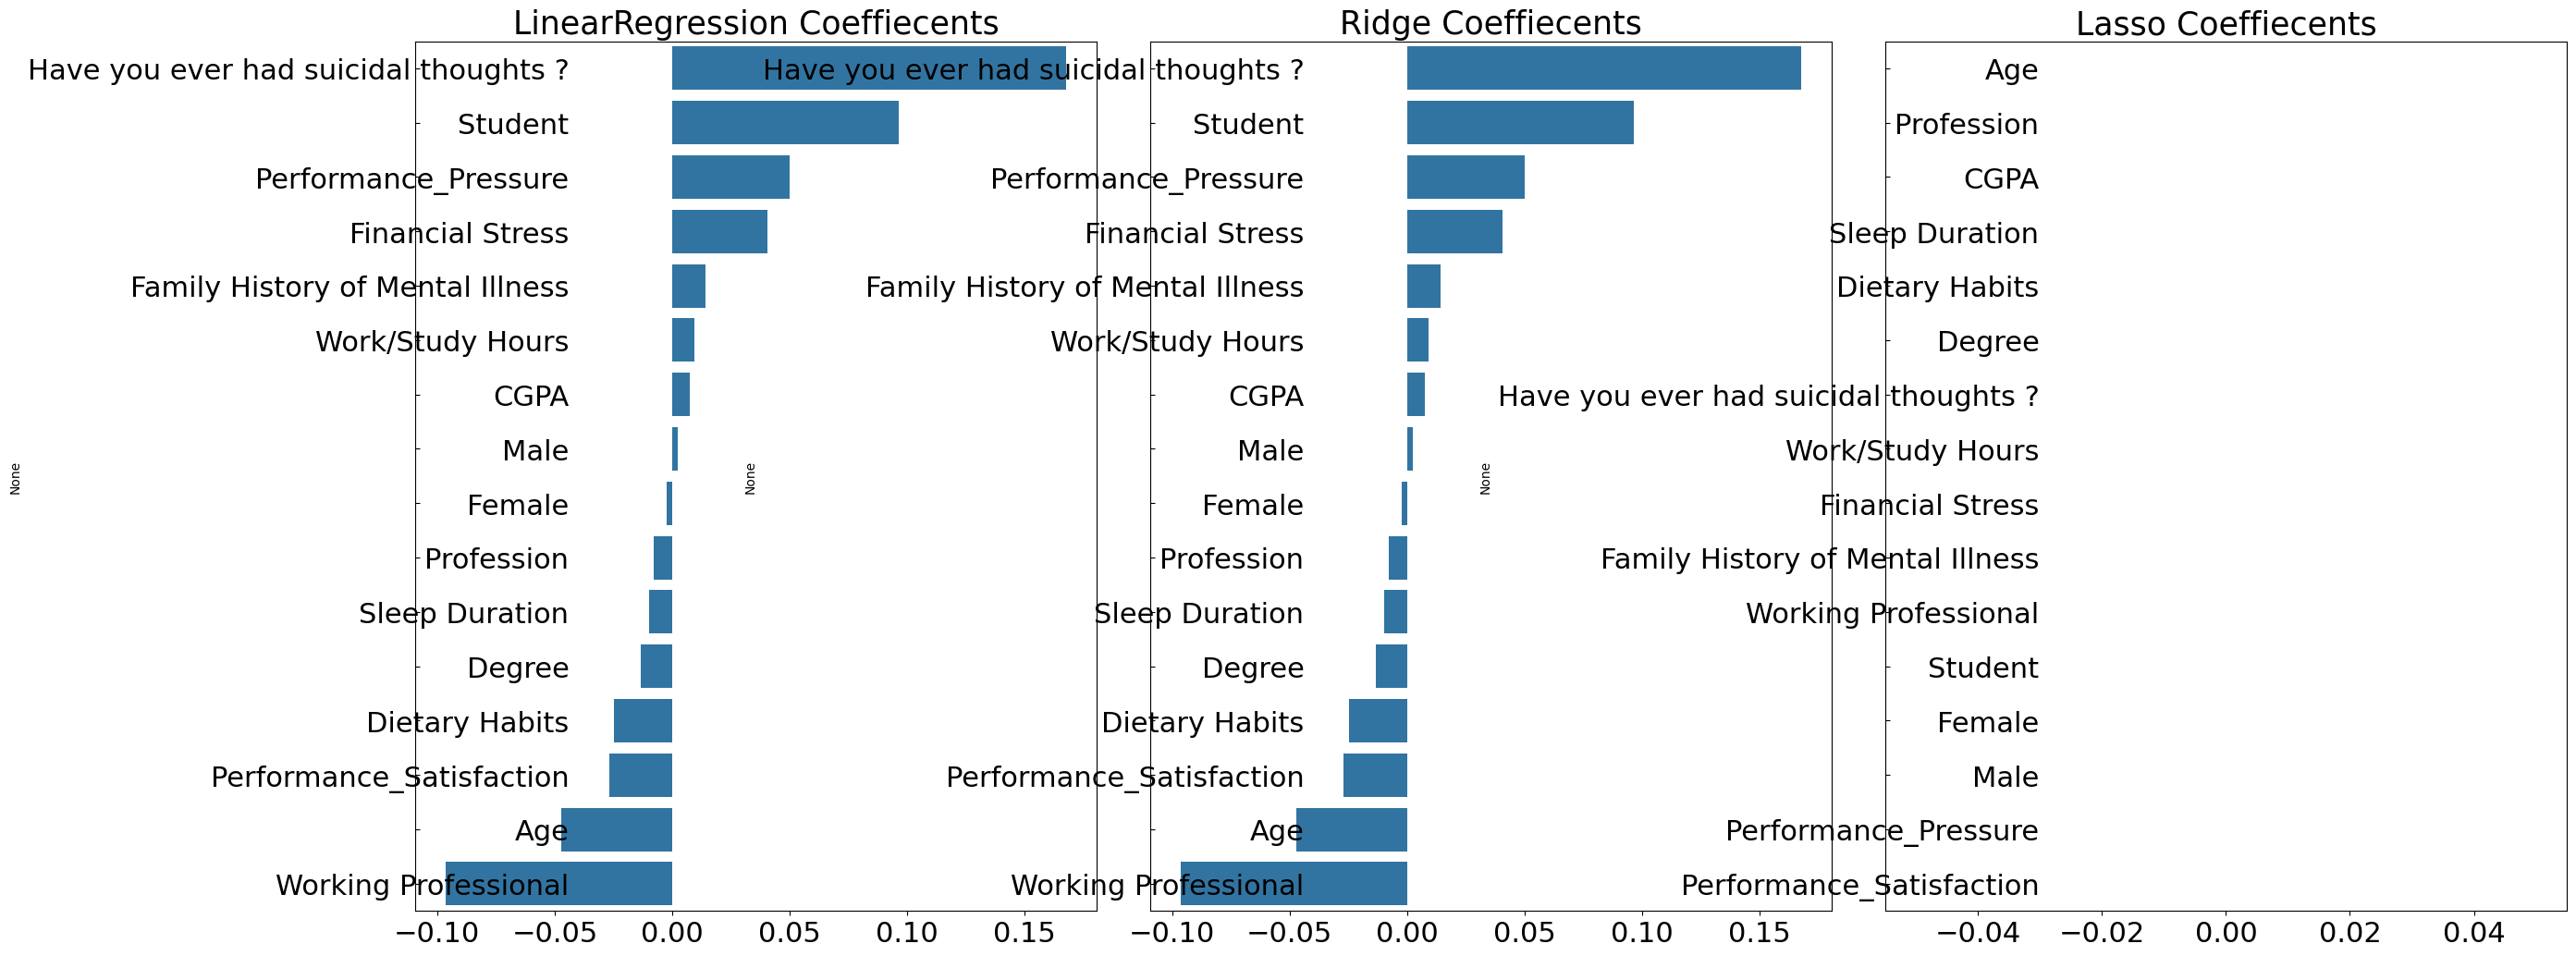

In [80]:
def visualize_coefficient(models):
    # 3개 회귀 모델의 시각화를 위해 3개의 컬럼을 가지는 subplot 생성
    fig, axs = plt.subplots(figsize=(24,10),nrows=1, ncols=3)
    fig.tight_layout()

    for i_num, model in enumerate(models): # models 리스트의 각 회귀 모델을 순차적으로 반복
        # 상위 10개, 하위 10개 회귀 계수를 구하고, 이를 판다스 concat으로 결합.
        coef_high, coef_low = get_top_bottom_coef(model)  # 모델의 회귀 계수 중 상위 10개, 하위 10개 변수 추출
        coef_concat = pd.concat( [coef_high , coef_low] ) # 두 시리즈를 위아래로 이어붙여 총 20개 변수로 구성된 시리즈 생성
        # 순차적으로 ax subplot에 barchar로 표현. 한 화면에 표현하기 위해 tick label 위치와 font 크기 조정.
        axs[i_num].set_title(model.__class__.__name__+' Coeffiecents', size=25)  # subplot 제목을 모델 이름으로 설정
        axs[i_num].tick_params(axis="y",direction="in", pad=-120) # y축 tick 방향 및 간격 조정 (글자 위치 안쪽으로 붙이기)
        for label in (axs[i_num].get_xticklabels() + axs[i_num].get_yticklabels()): # x축과 y축의 tick label 모두 가져오기
            label.set_fontsize(22) # tick label의 폰트 크기 크게 설정
        sns.barplot(x=coef_concat.values, y=coef_concat.index , ax=axs[i_num])


# 앞 예제에서 학습한 lr_reg, ridge_reg, lasso_reg 모델의 회귀 계수 시각화.
models = [lr_reg, ridge_reg, lasso_reg]
visualize_coefficient(models)

In [81]:

from sklearn.model_selection import cross_val_score

def get_avg_rmse_cv(models):
    for model in models:
        # 분할하지 않고 전체 데이터로 cross_val_score( ) 수행. 모델별 CV RMSE값과 평균 RMSE 출력
        rmse_list = np.sqrt(-cross_val_score(model, X_features, y_target,
                                             scoring="neg_mean_squared_error", cv = 5))
        rmse_avg = np.mean(rmse_list)
        print('\n{0} CV RMSE 값 리스트: {1}'.format( model.__class__.__name__, np.round(rmse_list, 3)))
        print('{0} CV 평균 RMSE 값: {1}'.format( model.__class__.__name__, np.round(rmse_avg, 3)))

# 앞 예제에서 학습한 lr_reg, ridge_reg, lasso_reg 모델의 CV RMSE값 출력
models = [lr_reg, ridge_reg, lasso_reg]
get_avg_rmse_cv(models)


LinearRegression CV RMSE 값 리스트: [0.264 0.264 0.267 0.265 0.264]
LinearRegression CV 평균 RMSE 값: 0.265

Ridge CV RMSE 값 리스트: [0.264 0.264 0.267 0.265 0.264]
Ridge CV 평균 RMSE 값: 0.265

Lasso CV RMSE 값 리스트: [0.384 0.385 0.386 0.386 0.388]
Lasso CV 평균 RMSE 값: 0.386


In [82]:

from sklearn.model_selection import cross_val_score

def get_avg_rmse_cv(models):
    for model in models:
        # 분할하지 않고 전체 데이터로 cross_val_score( ) 수행. 모델별 CV RMSE값과 평균 RMSE 출력
        rmse_list = np.sqrt(-cross_val_score(model, X_features, y_target,
                                             scoring="neg_mean_squared_error", cv = 5))
        rmse_avg = np.mean(rmse_list)
        print('\n{0} CV RMSE 값 리스트: {1}'.format( model.__class__.__name__, np.round(rmse_list, 3)))
        print('{0} CV 평균 RMSE 값: {1}'.format( model.__class__.__name__, np.round(rmse_avg, 3)))

# 앞 예제에서 학습한 lr_reg, ridge_reg, lasso_reg 모델의 CV RMSE값 출력
models = [lr_reg, ridge_reg, lasso_reg]
get_avg_rmse_cv(models)


LinearRegression CV RMSE 값 리스트: [0.264 0.264 0.267 0.265 0.264]
LinearRegression CV 평균 RMSE 값: 0.265

Ridge CV RMSE 값 리스트: [0.264 0.264 0.267 0.265 0.264]
Ridge CV 평균 RMSE 값: 0.265

Lasso CV RMSE 값 리스트: [0.384 0.385 0.386 0.386 0.388]
Lasso CV 평균 RMSE 값: 0.386


In [83]:

from sklearn.model_selection import GridSearchCV

def print_best_params(model, params):
    grid_model = GridSearchCV(model, param_grid=params,
                              scoring='neg_mean_squared_error', cv=5)
    grid_model.fit(X_features, y_target)
    rmse = np.sqrt(-1* grid_model.best_score_)
    print('{0} 5 CV 시 최적 평균 RMSE 값: {1}, 최적 alpha:{2}'.format(model.__class__.__name__,
                                        np.round(rmse, 4), grid_model.best_params_))
    return grid_model.best_estimator_

ridge_params = { 'alpha':[0.05, 0.1, 1, 5, 8, 10, 12, 15, 20] }
lasso_params = { 'alpha':[0.001, 0.005, 0.008, 0.05, 0.03, 0.1, 0.5, 1,5, 10] }
# linear는 튜닝 불가

best_rige = print_best_params(ridge_reg, ridge_params)
best_lasso = print_best_params(lasso_reg, lasso_params)

Ridge 5 CV 시 최적 평균 RMSE 값: 0.2647, 최적 alpha:{'alpha': 1}
Lasso 5 CV 시 최적 평균 RMSE 값: 0.2649, 최적 alpha:{'alpha': 0.001}


LinearRegression 로그 변환된 RMSE: 0.266
LinearRegression 로그 변환된 MSE: 0.071
LinearRegression 로그 변환해제 RMSE: 0.45
LinearRegression 로그 변환해제 MSE: 0.203
Ridge 로그 변환된 RMSE: 0.266
Ridge 로그 변환된 MSE: 0.071
Ridge 로그 변환해제 RMSE: 0.45
Ridge 로그 변환해제 MSE: 0.203
Lasso 로그 변환된 RMSE: 0.266
Lasso 로그 변환된 MSE: 0.071
Lasso 로그 변환해제 RMSE: 0.452
Lasso 로그 변환해제 MSE: 0.204


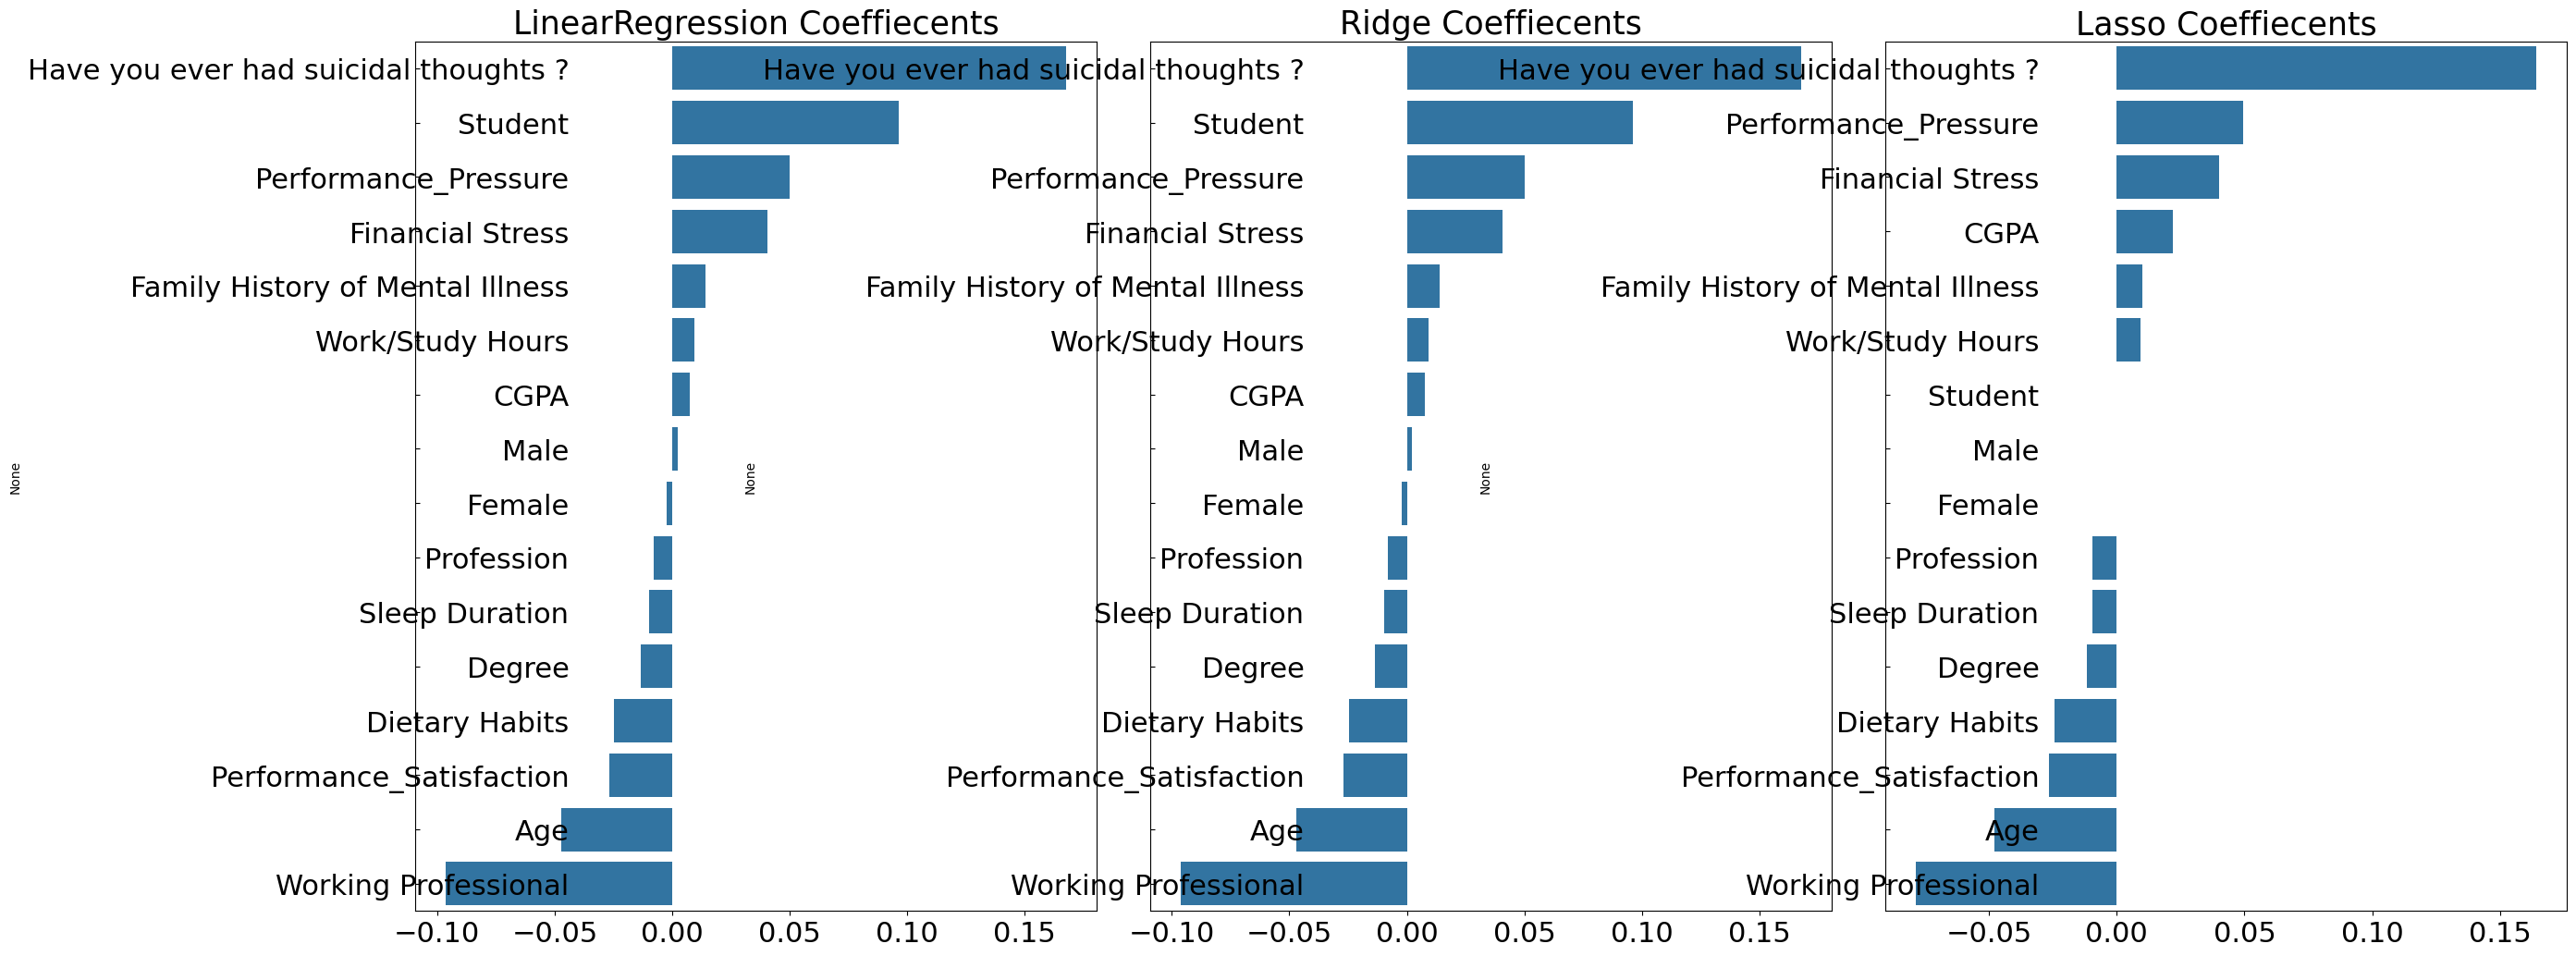

In [84]:
# 앞의 최적화 alpha값으로 학습데이터로 학습, 테스트 데이터로 예측 및 평가 수행.
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
ridge_reg = Ridge(alpha=5)
ridge_reg.fit(X_train, y_train)
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(X_train, y_train)

# 모든 모델의 RMSE 출력
models = [lr_reg, ridge_reg, lasso_reg]
get_rmses(models)

# 모든 모델의 회귀 계수 시각화
models = [lr_reg, ridge_reg, lasso_reg]
visualize_coefficient(models)

In [85]:
from scipy.stats import skew

# 3. 왜도 계산
skew_vals = train.apply(lambda x: skew(x))

# 4. 왜도 > 1인 열만 추출
high_skew = skew_vals[skew_vals > 1].sort_values(ascending=False)

In [86]:
skew_features_top = high_skew[high_skew > 1]
print(skew_features_top.sort_values(ascending=False))

CGPA          1.685951
Depression    1.650969
Student       1.513504
dtype: float64


In [87]:
train[skew_features_top.index] = np.log1p(train[skew_features_top.index])

In [88]:
# Skew가 높은 피처들을 로그 변환 했으므로 다시 원-핫 인코딩 적용 및 피처/타겟 데이터 셋 생성,
train_ohe = pd.get_dummies(train)
y_target = train['Depression']
X_features = train_ohe.drop('Depression',axis=1, inplace=False)
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.2, random_state=156)

# 피처들을 로그 변환 후 다시 최적 하이퍼 파라미터와 RMSE 출력
ridge_params = { 'alpha':[0.05, 0.1, 1, 5, 8, 10, 12, 15, 20] }
lasso_params = { 'alpha':[0.001, 0.005, 0.008, 0.05, 0.03, 0.1, 0.5, 1,5, 10] }
best_ridge = print_best_params(ridge_reg, ridge_params)
best_lasso = print_best_params(lasso_reg, lasso_params)

Ridge 5 CV 시 최적 평균 RMSE 값: 0.1835, 최적 alpha:{'alpha': 15}
Lasso 5 CV 시 최적 평균 RMSE 값: 0.1836, 최적 alpha:{'alpha': 0.001}


LinearRegression 로그 변환된 RMSE: 0.184
LinearRegression 로그 변환된 MSE: 0.034
LinearRegression 로그 변환해제 RMSE: 0.26
LinearRegression 로그 변환해제 MSE: 0.068
Ridge 로그 변환된 RMSE: 0.184
Ridge 로그 변환된 MSE: 0.034
Ridge 로그 변환해제 RMSE: 0.26
Ridge 로그 변환해제 MSE: 0.068
Lasso 로그 변환된 RMSE: 0.184
Lasso 로그 변환된 MSE: 0.034
Lasso 로그 변환해제 RMSE: 0.261
Lasso 로그 변환해제 MSE: 0.068


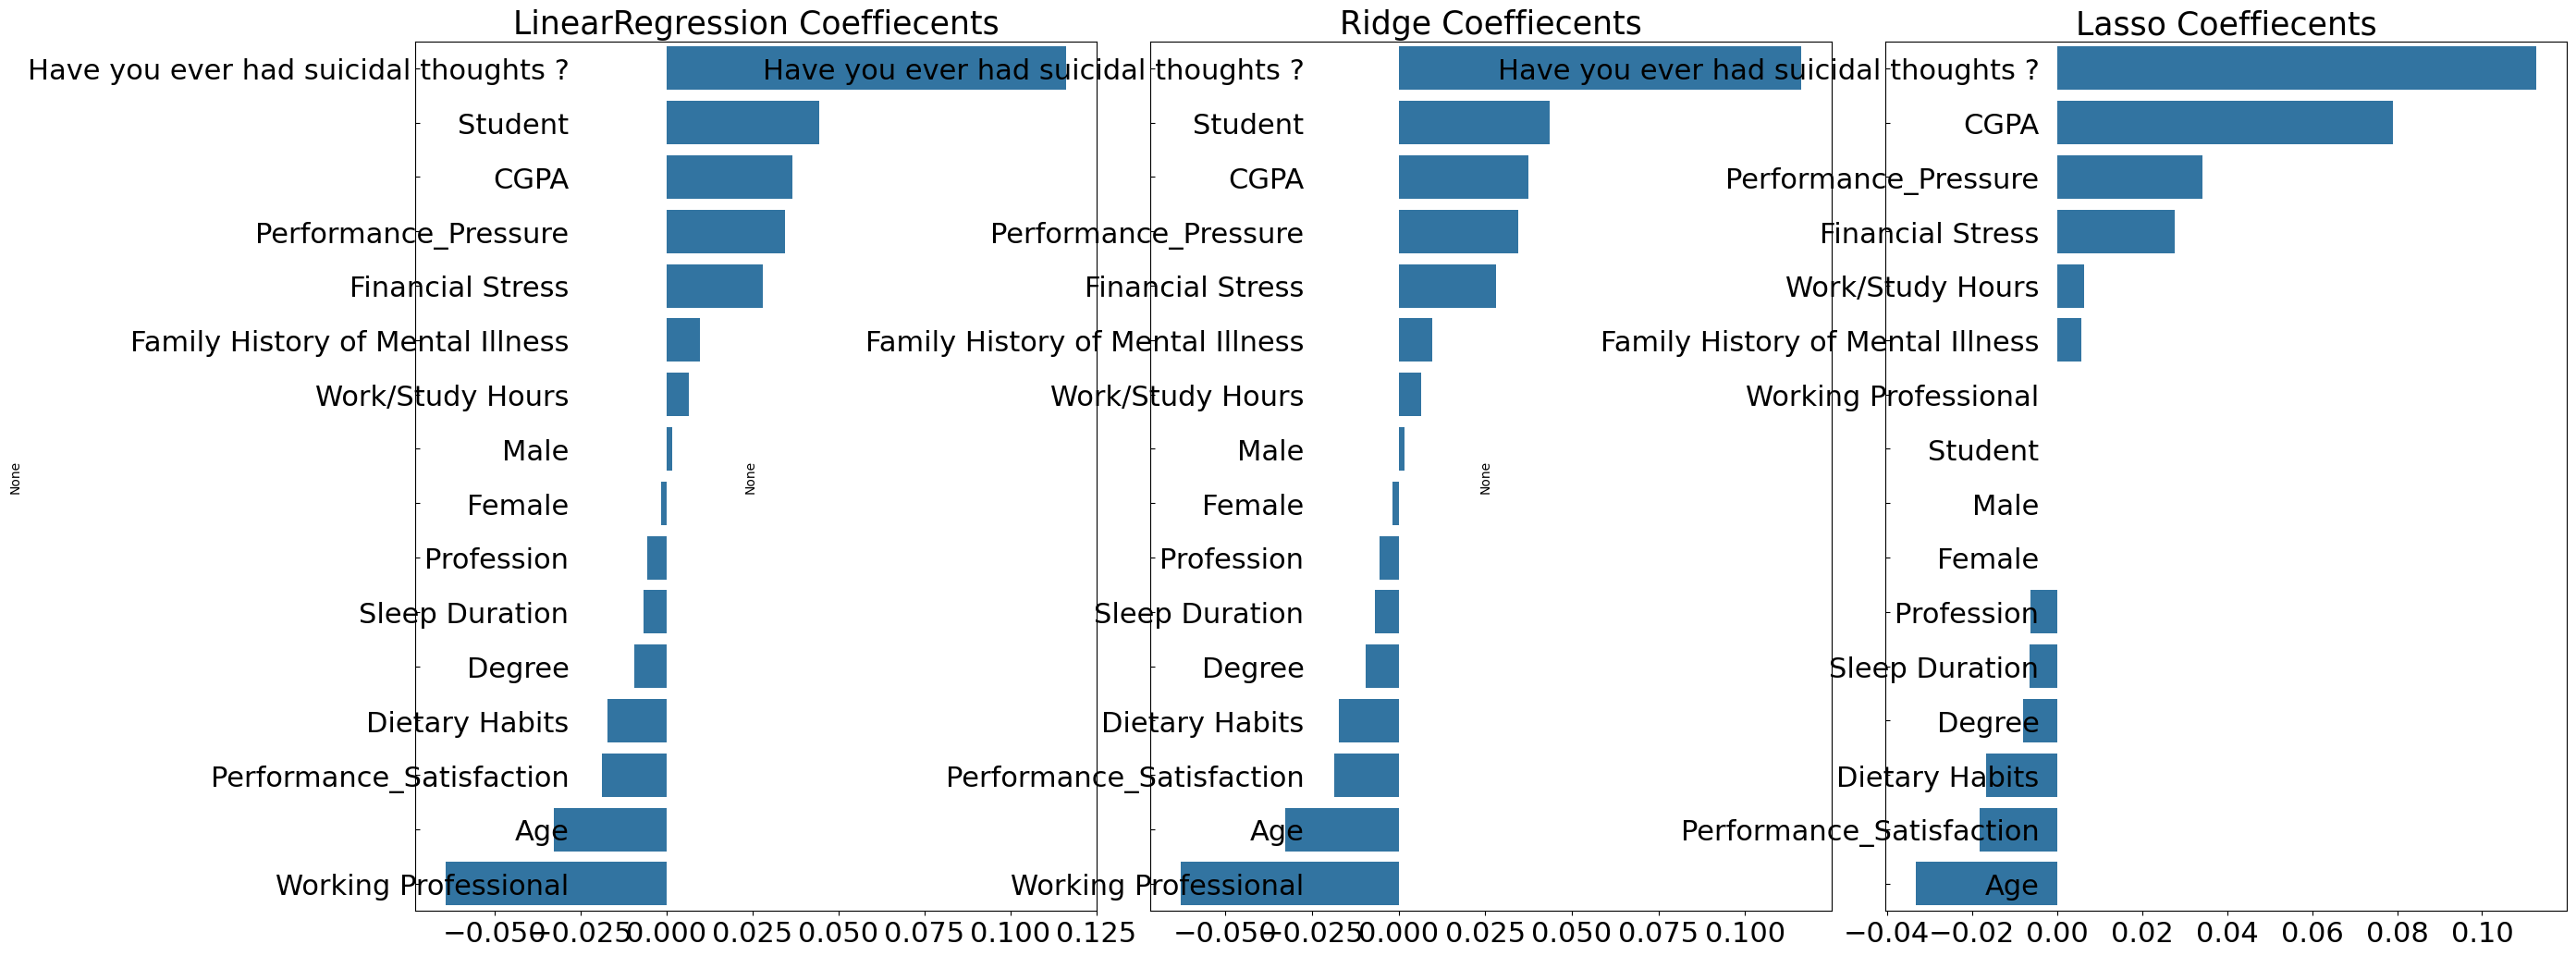

In [89]:

# 앞의 최적화 alpha값으로 학습데이터로 학습, 테스트 데이터로 예측 및 평가 수행.
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
ridge_reg = Ridge(alpha=10)
ridge_reg.fit(X_train, y_train)
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(X_train, y_train)

# 모든 모델의 RMSE 출력
models = [lr_reg, ridge_reg, lasso_reg]
get_rmses(models)

# 모든 모델의 회귀 계수 시각화
models = [lr_reg, ridge_reg, lasso_reg]
visualize_coefficient(models)

In [90]:

from xgboost import XGBRegressor

xgb_params = {'n_estimators':[1000]} #탐색할 파라미터 설정
xgb_reg = XGBRegressor(n_estimators=1000, learning_rate=0.05,
                       colsample_bytree=0.5, subsample=0.8)

# xgb_reg = XGBRegressor(
#     n_estimators=1000,       # 트리 개수 (기본보다 많음, 충분히 학습할 수 있게 설정)
#     learning_rate=0.05,      # 학습률 (작을수록 더 천천히, 안정적으로 학습)
#     colsample_bytree=0.5,    # 각 트리에서 사용할 피처 비율 (과적합 방지용)
#     subsample=0.8            # 각 트리에서 사용할 샘플 비율 (과적합 방지용)
# )

best_xgb = print_best_params(xgb_reg, xgb_params)
# 위에서 정의한 모델을 print_best_params() 함수에 전달하여 학습 및 평가 진행

XGBRegressor 5 CV 시 최적 평균 RMSE 값: 0.1504, 최적 alpha:{'n_estimators': 1000}


In [91]:

from lightgbm import LGBMRegressor

lgbm_params = {'n_estimators':[1000]}
lgbm_reg = LGBMRegressor(n_estimators=1000, learning_rate=0.05, num_leaves=4,
                         subsample=0.6, colsample_bytree=0.4, reg_lambda=10, n_jobs=-1)
best_lgbm = print_best_params(lgbm_reg, lgbm_params)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.021461 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 81
[LightGBM] [Info] Number of data points in the train set: 112552, number of used features: 16
[LightGBM] [Info] Start training from score 0.126242
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.024049 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 81
[LightGBM] [Info] Number of data points in the train set: 112552, number of used features: 16
[LightGBM] [Info] Start training from score 0.126051
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of test

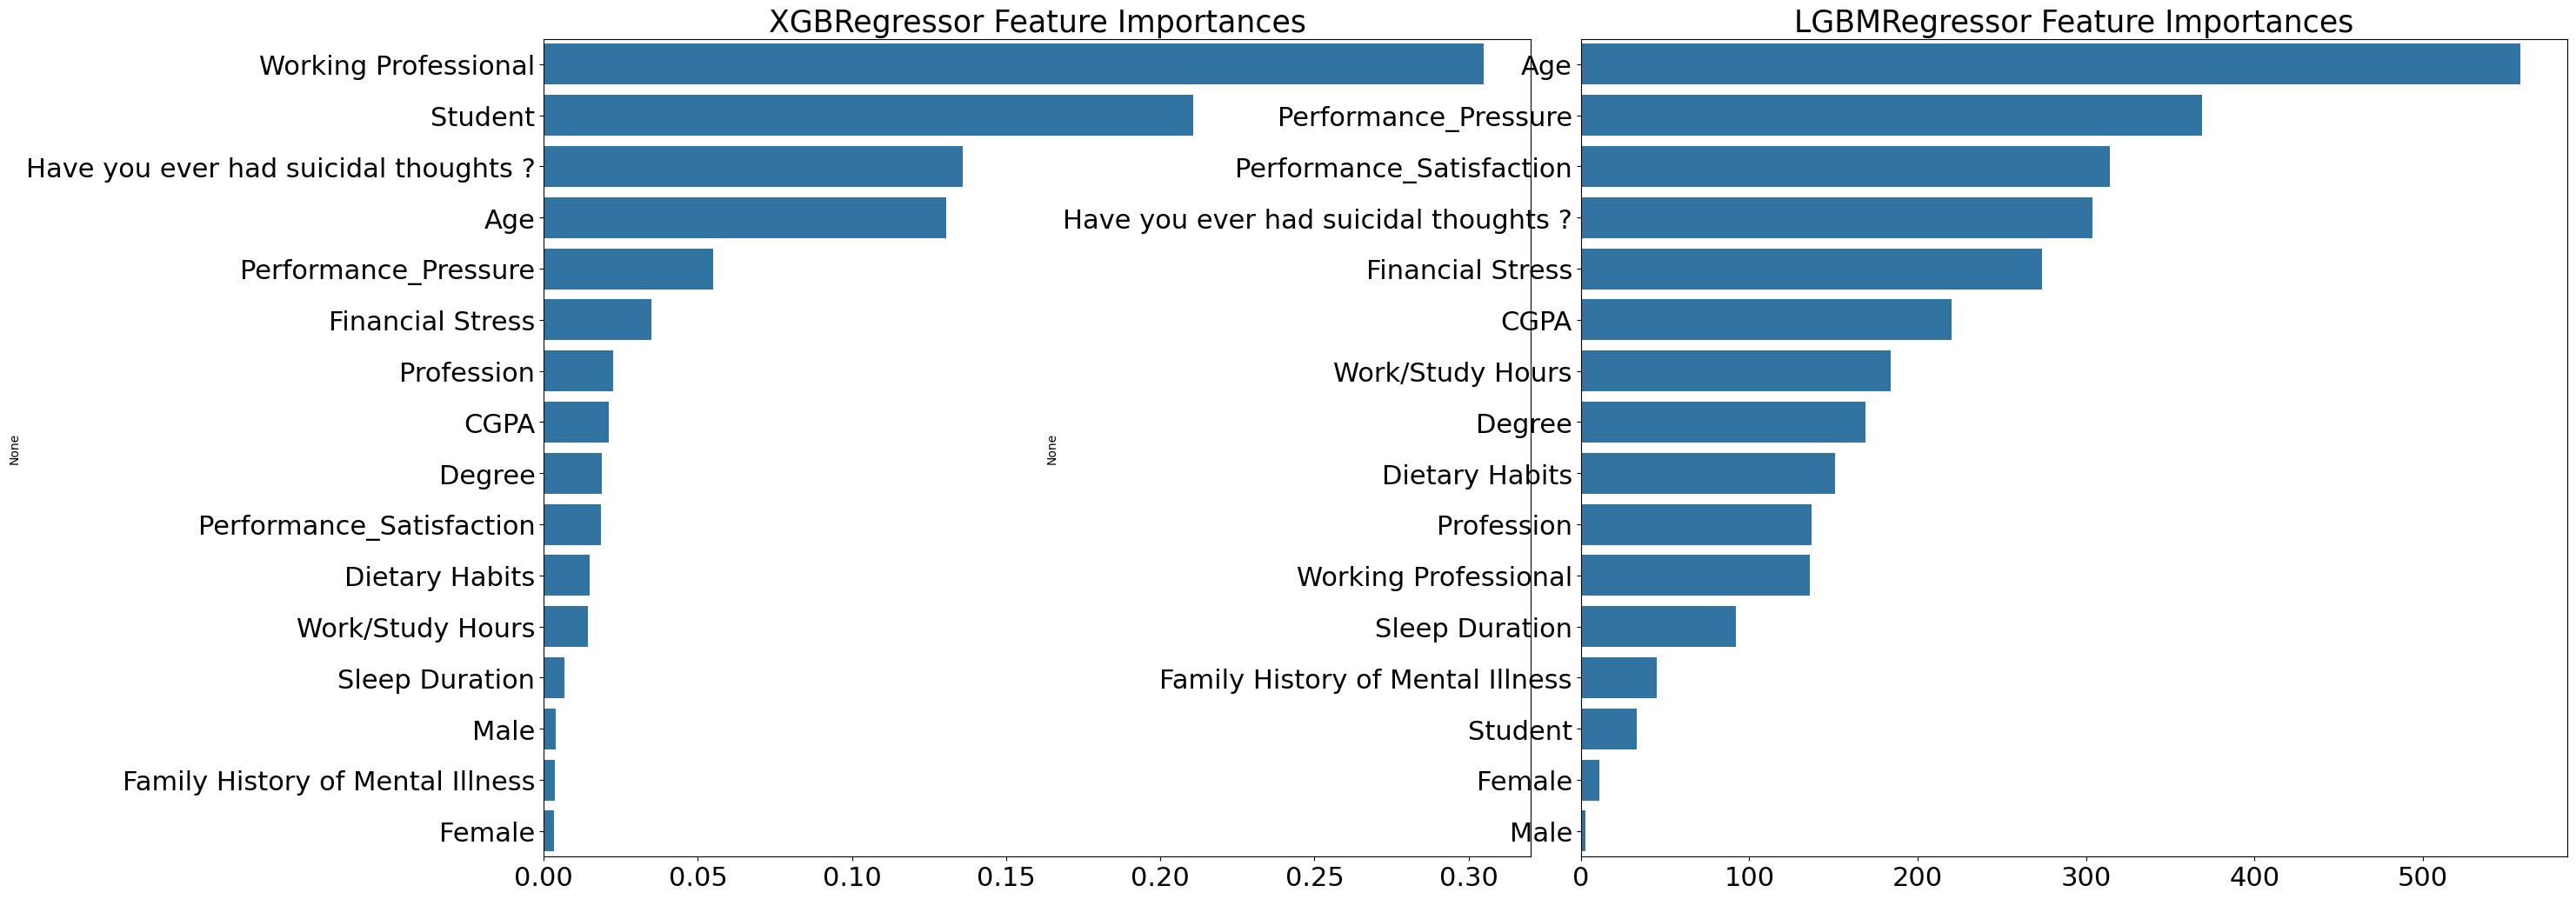

In [92]:
 # 모델의 중요도 상위 20개의 피처명과 그때의 중요도값을 Series로 반환.
def get_top_features(model):
    ftr_importances_values = model.feature_importances_
    ftr_importances = pd.Series(ftr_importances_values, index=X_features.columns  )
    ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]
    return ftr_top20

def visualize_ftr_importances(models):
    # 2개 회귀 모델의 시각화를 위해 2개의 컬럼을 가지는 subplot 생성
    fig, axs = plt.subplots(figsize=(24,10),nrows=1, ncols=2)
    fig.tight_layout()
    # 입력인자로 받은 list객체인 models에서 차례로 model을 추출하여 피처 중요도 시각화.
    for i_num, model in enumerate(models):
        # 중요도 상위 20개의 피처명과 그때의 중요도값 추출
        ftr_top20 = get_top_features(model)
        axs[i_num].set_title(model.__class__.__name__+' Feature Importances', size=25)
        #font 크기 조정.
        for label in (axs[i_num].get_xticklabels() + axs[i_num].get_yticklabels()):
            label.set_fontsize(22)
        sns.barplot(x=ftr_top20.values, y=ftr_top20.index , ax=axs[i_num])

# 앞 예제에서 print_best_params( )가 반환한 GridSearchCV로 최적화된 모델의 피처 중요도 시각화
models = [best_xgb, best_lgbm]
visualize_ftr_importances(models)

In [93]:
from ast import increment_lineno
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from collections import Counter
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
from sklearn.model_selection import cross_val_score, KFold


In [94]:
y_train = y_train.round().astype(int)

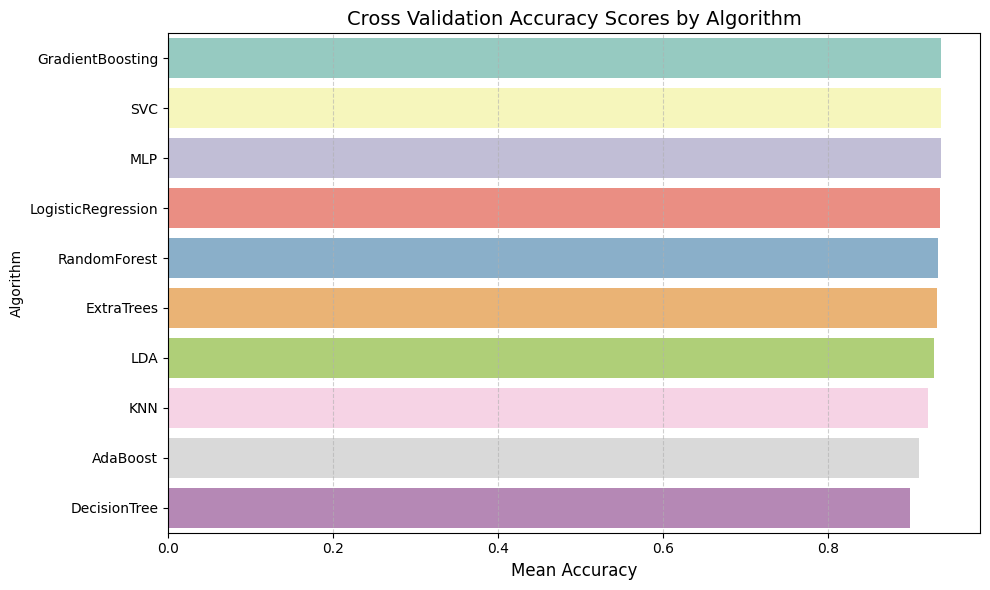

In [97]:
# 필수 라이브러리 불러오기
from sklearn.model_selection import cross_val_score, KFold
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    RandomForestClassifier,
    ExtraTreesClassifier,
    GradientBoostingClassifier
)
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 교차검증 설정
random_state = 2
kfold = KFold(n_splits=10, shuffle=True, random_state=random_state)

# 분류기 리스트 정의
classifiers = [
    SVC(random_state=random_state),
    DecisionTreeClassifier(random_state=random_state),
    AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state), random_state=random_state, learning_rate=0.1),
    RandomForestClassifier(random_state=random_state),
    ExtraTreesClassifier(random_state=random_state),
    GradientBoostingClassifier(random_state=random_state),
    MLPClassifier(random_state=random_state),
    KNeighborsClassifier(),
    LogisticRegression(random_state=random_state, max_iter=1000),
    LinearDiscriminantAnalysis()
]

classifier_names = [
    "SVC", "DecisionTree", "AdaBoost", "RandomForest", "ExtraTrees",
    "GradientBoosting", "MLP", "KNN", "LogisticRegression", "LDA"
]

# 교차검증 수행
cv_means = []
cv_std = []

for clf in classifiers:
    scores = cross_val_score(clf, X_train, y_train, scoring="accuracy", cv=kfold, n_jobs=-1)
    cv_means.append(scores.mean())
    cv_std.append(scores.std())

# 결과 정리
cv_res = pd.DataFrame({
    "Algorithm": classifier_names,
    "CrossValMeans": cv_means,
    "CrossValErrors": cv_std
}).sort_values("CrossValMeans", ascending=False)

# 시각화
plt.figure(figsize=(10, 6))
sns.barplot(
    x="CrossValMeans",
    y="Algorithm",
    data=cv_res,
    palette="Set3",
    orient="h"
)
plt.xlabel("Mean Accuracy", fontsize=12)
plt.title("Cross Validation Accuracy Scores by Algorithm", fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


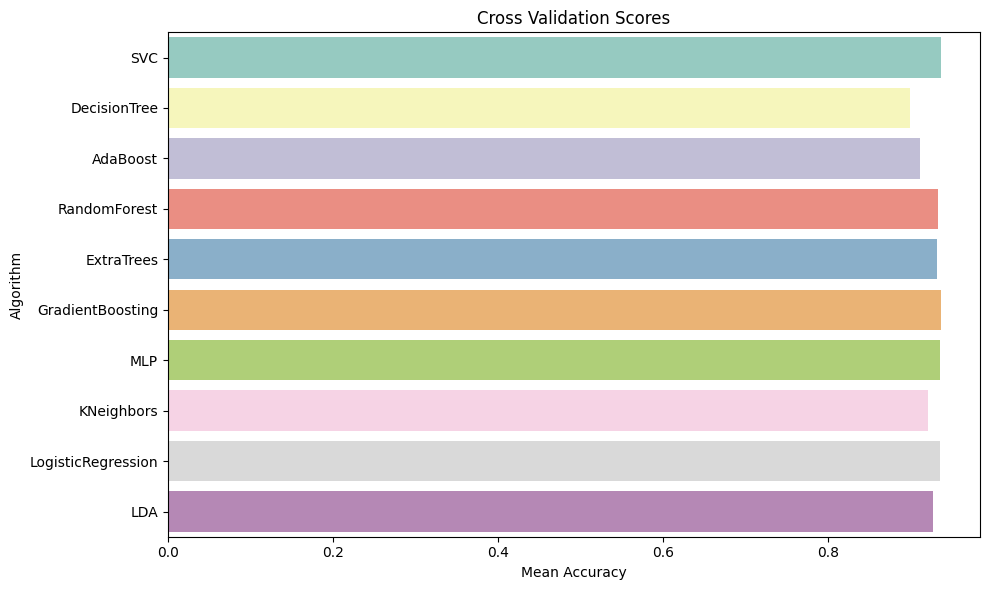

NameError: name 'g' is not defined

In [98]:
# Modeling step Test differents algorithms

# ✅ 설정
random_state = 2
cv = KFold(n_splits=5, shuffle=True, random_state=random_state)

# ✅ 모델 리스트
classifiers = [
    SVC(random_state=random_state),
    DecisionTreeClassifier(random_state=random_state),
    AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state), random_state=random_state, learning_rate=0.1),
    RandomForestClassifier(random_state=random_state),
    ExtraTreesClassifier(random_state=random_state),
    GradientBoostingClassifier(random_state=random_state),
    MLPClassifier(random_state=random_state),
    KNeighborsClassifier(),
    LogisticRegression(random_state=random_state, max_iter=1000),
    LinearDiscriminantAnalysis()
]

# ✅ 교차 검증
cv_results = []
for clf in classifiers:
    scores = cross_val_score(clf, X=X_train, y=y_train, scoring="accuracy", cv=cv, n_jobs=4)
    cv_results.append(scores)

# ✅ 결과 정리
cv_means = [r.mean() for r in cv_results]
cv_std = [r.std() for r in cv_results]

cv_res = pd.DataFrame({
    "CrossValMeans": cv_means,
    "CrossValerrors": cv_std,
    "Algorithm": [
        "SVC", "DecisionTree", "AdaBoost", "RandomForest", "ExtraTrees",
        "GradientBoosting", "MLP", "KNeighbors", "LogisticRegression", "LDA"
    ]
})

# ✅ 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x="CrossValMeans", y="Algorithm", data=cv_res, palette="Set3", orient="h")
plt.xlabel("Mean Accuracy")
plt.title("Cross Validation Scores")
plt.tight_layout()
plt.show()


plt.xlabel("Mean Accuracy")
plt.title("Cross Validation Accuracy Scores by Algorithm", fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()



#8. 평가

In [101]:
confusion = confusion_matrix(test_y, pred_y)
accuracy  = accuracy_score(test_y, pred_y)
precision = precision_score(test_y, pred_y)
recall    = recall_score(test_y, pred_y)

print('================= confusion matrix ====================')
print(confusion)
print('=======================================================')
print(f'정확도:{accuracy}, 정밀도:{precision}, 재현율:{recall}')

NameError: name 'confusion_matrix' is not defined

In [ ]:
fpr, tpr, thresholds = roc_curve(test_y, prob_y[:,1])
auc = roc_auc_score(test_y, prob_y[:,1])
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
plt.xlabel('fpr')
plt.ylabel('tpr')
print(f'auc:{auc}')

# 9. 제출용 데이터 전처리

In [ ]:
X_train.shape

In [ ]:
## test_data를 받아오기
test = pd.read_csv('./test.csv')

# Null 이 너무 많은 컬럼들과 불필요한 컬럼 삭제
test.drop(['Id','PoolQC' , 'MiscFeature', 'Alley', 'Fence','FireplaceQu'], axis=1 , inplace=True)

num_cols = test.select_dtypes(include=['number']).columns
test[num_cols] = test[num_cols].fillna(test[num_cols].mean())
test_ohe1 = pd.get_dummies(test)
test_ohe2 = test_ohe1.reindex(columns=X_train.columns, fill_value=0)

# 편향 전처리 진행
test_ohe2[skew_features_top.index] = np.log1p(test_ohe2[skew_features_top.index])
test_ohe2 = pd.get_dummies(test_ohe2)

test_ohe2.shape

# 10. 저장

In [ ]:
## sample_data를 받아오기
sample = pd.read_csv('./sample_submission.csv')

# SalePrice 가 0으로 차있는 sample
sample

In [ ]:
# (4) sample_submission에 넣기
sample = pd.read_csv("sample_submission.csv")
sample["Depression"] = final_pred_exp
print("예측값 개수:", final_pred_exp.shape)
print("sample 행 개수:", sample.shape[0])

In [ ]:
sample.shape

In [ ]:
pred_exp

In [ ]:
sample.to_csv("submission1.csv", index=False)
print("✅ submission.csv 저장 완료!")